In [ ]:
# Business Understanding
# You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

# 1.If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

# 2.If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


##Objective
##Performing EDA to understand how consumer attributes and loan attributes influence the tendency of default.

##Constraints
#When a person applies for loan, there are two types of decisions that could be taken by a company.
## 1.Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
#
# 2.Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

#3.Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

##4.Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
    #Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.).
    #Since the loan was rejected, there is no transactional history of those applicants with the company and
    #so this data is not available with the company (and thus in this dataset)
#     the dataset from below. It contains the complete loan data for all loans issued through the time period 2007 t0 2011.


In [ ]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
loan = pd.read_csv("loan.csv")
dict = pd.read_excel('Data_Dictionary.xlsx')

In [ ]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
loan.shape

(39717, 111)

In [ ]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


Dropping Rows
where loan_status = "Current"


In [ ]:
prev_rows = len(loan)
# Dropping the rwos early as, dropping all Currrent rows introduces NA columns which can be easily dropped
loan = loan[loan['loan_status'] != "Current"]

In [ ]:
# Print current data statistics after dropping rows with loan_status "CURRENT"
curr_rows = len(loan)

print("Number of rows dropped where loan_status = 'Current':", (prev_rows - curr_rows))
print("Percentage of rows dropped = ", round((prev_rows - curr_rows)/prev_rows*100,2),"%")

Number of rows dropped where loan_status = 'Current': 1140
Percentage of rows dropped =  2.87 %


In [ ]:
# Find any duplicate rows in the dataset
duplicate_rows = len(loan[loan.duplicated()])
if duplicate_rows <= 0:
    print("Duplicate Rows: ", duplicate_rows)
    print("No action needed")
else:
    print("Do something")

Duplicate Rows:  0
No action needed


In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Dropping Columns

In [ ]:
# Dropping columns which is unique id in nature. They dont contribute to loan analysis

# Checking if member_id is unique
if len(loan['member_id'].unique()) == loan.shape[0]:
    print("member_id is unique, can be dropped")
    loan = loan.drop(['member_id'],  axis=1)
else:
    print("member_id is not unique, dont drop")

# Checking if id is unique
if len(loan['id'].unique()) == loan.shape[0]:
    print("id is unique, can be dropped")
    # not dropping id as it will be used for pivot calculation later
    # loan = loan.drop(['id'],  axis=1)
else:
    print("id is not unique, dont drop")

member_id is unique, can be dropped
id is unique, can be dropped


In [ ]:
# Dropping text/description columns which wont contribute to overall analysis
# These are names of establishment etc which will not contribute to loan pass or failure
# THe URL column is a static link with id as the attribute. Its a redundant column
loan = loan.drop(['url', 'emp_title', 'desc', 'title'],  axis=1)

# Dropping column sub_grade as the current analysis will limit to Grade only
loan = loan.drop(['sub_grade'],  axis=1)

In [ ]:
# Dropping all columns which refer to behavoural data of customer post loan approval
# Behaviour data of the customers are captured post the loan approval
# The data is not available at the time of loan approval and thus cannot be used for calculations
loan = loan.drop(['delinq_2yrs', 'earliest_cr_line',
                          'inq_last_6mths', 'open_acc', 'pub_rec',
                          'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt',
                          'total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries',
                          'collection_recovery_fee', 'last_pymnt_d',
                          'last_pymnt_amnt', 'last_credit_pull_d',
                          'application_type'],  axis=1)

In [ ]:
# Dropping all columns whose all the values are NA
# Print all NA columns for verification
print("Total columns with values NA: ", len(loan.columns[loan.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", loan.columns[loan.isna().all()].tolist())

# Dropping all the columns whose all the records are NaN or Null
loan = loan.dropna(axis='columns', how="all")

Total columns with values NA:  55 


Columns with all values as NA
 ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_7

In [ ]:
# Dropping all columns with all zero values
loan = loan.loc[:, (loan != 0).any(axis=0)]

In [ ]:
# Function to Drop all columns who have constant values (ignoring NA value)
# Example most of the columns is 1 and rest is NA, the column will be dropped
# If we have 1,2 and NA, the column wont be dropped
print("Columns with constant values with or without NA")
def drop_constant_columns(df):
    for c in df.columns:
        if df[c].nunique(dropna=True) == 1:
            print(c)
            df = df.drop(c, axis=1)
    return df

# Drop all constant columns from df1 (definition of constant is constant value across the rows, this ignores Na values)
loan = drop_constant_columns(loan)

Columns with constant values with or without NA
pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
chargeoff_within_12_mths
tax_liens


In [ ]:
# Function which checks the amount of empty values in a dataframe and
# drops the column if the amount of empty values is more than 65%
# 60% is the threshhold percentage which decides imputing vs dropping
print("Columns with more that 65% empty records")
def drop_mostly_empty_columns(df):
    total_rows = len(df)
    for c in df.columns:
        # Drop columns whose mean na values exceed 65%
        if df[c].isna().mean().round(2) >= 0.65:
            print(c)
            df = df.drop(c, axis=1)
    return df
loan = drop_mostly_empty_columns(loan)

Columns with more that 65% empty records
mths_since_last_delinq
mths_since_last_record


Data **Conversion**

In [ ]:
# Convert the columns loan_amnt and funded_amnt as flot64
loan = loan.astype({'loan_amnt':'float','funded_amnt':'float'})

In [ ]:
# Convert the term column into an integer from a string
loan['term'] = loan['term'].apply(lambda x : int(x[:-7]))

In [ ]:
# Convert int_rate to  float by removing the "%" character
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x[:-1]))

In [ ]:
# Round off the values of key float fields to 2 decimal place
# all int_rate and dti already limited to 2 edcimal
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    loan[c] = loan[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [ ]:
# Converting the loan_status to boolean column. "Fully-Paid is True and Charged Off is False"
# Added a function instead of lambda because, if this is accidentally re-run on a boolean column, the logic broke
# Now it will only convert to boolean if the column is a string and has the two specific values
def convert_loan_status_to_boolean(x):
    if x == "Fully Paid":
        return True
    elif x == "Charged Off":
        return False
    else:
        return x

#loan['loan_status'] = loan['loan_status'].apply(lambda x: convert_loan_status_to_boolean(x))

In [ ]:
# Converting the column issue_d from string object to DateTime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

Imputing vs Dropping Columns

Evaluating the percentage of rows with blank values for both the columns. If the total percentage is less than 5% will take an option of dropping the columns vs imputing


In [ ]:
# Identify columns who have blank values and what percentage of total values are there blanks.
# These values may need to be imputed
print('emp_length blank rows', loan['emp_length'].isna().sum())
print('pub_rec_bankruptcies blank rows', loan['pub_rec_bankruptcies'].isna().sum(), "\n")
imp_total = 0
for c in loan.columns[loan.isna().any()].tolist():
    imp_val = len(loan[loan[c].isna()]) / len(loan) * 100
    imp_total += imp_val
    print(c, round(imp_val, 2),"%")
print("\nTotal rows percentage whose columns are blank: ", round(imp_total ,2), "%")

emp_length blank rows 1033
pub_rec_bankruptcies blank rows 697 

emp_length 2.68 %
pub_rec_bankruptcies 1.81 %

Total rows percentage whose columns are blank:  4.48 %


In [ ]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
loan['emp_length'] = loan['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3,
                                                         '7 years': 7, '4 years': 4, '5 years': 5,
                                                         '1 year': 1, '6 years': 6, '8 years': 8,
                                                         '9 years': 9,  '10+ years': 10})

In [ ]:
# Print the current dimensions of the dataframe
rows_before = len(loan)

In [ ]:
# Drop rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

In [ ]:
# Checking if blanks exist
loan['emp_length'].value_counts()

10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: emp_length, dtype: int64

In [ ]:
# Print the dimensions of the dataframe after dropping rows
rows_after = len(loan)
print("Number of rows dropped = ,", (rows_before - rows_after))
print("Percentage of rows dropped = ", round((rows_before - rows_after)/rows_before*100,2),"%")
print(loan.shape)

Number of rows dropped = , 1730
Percentage of rows dropped =  4.48 %
(36847, 19)


Derived Columns

In [ ]:
# Adding additional column for Year and Month for analysis extrating Year and Month from issue_d
loan['issue_y'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_m'] = pd.DatetimeIndex(loan['issue_d']).month

In [ ]:
# Bucketting Months to quarters
def bucket_issue_m(column):
    if column < 4:
        return 'Q1'
    elif (column >= 4) and (column < 7):
        return 'Q2'
    elif (column >= 7) and (column < 9):
        return 'Q3'
    else:
        return 'Q4' # 75% quartile

loan['issue_q'] = loan.apply(lambda x : bucket_issue_m(x['issue_m']), axis = 1)

In [ ]:
loan['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['loan_amnt_b'] = loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

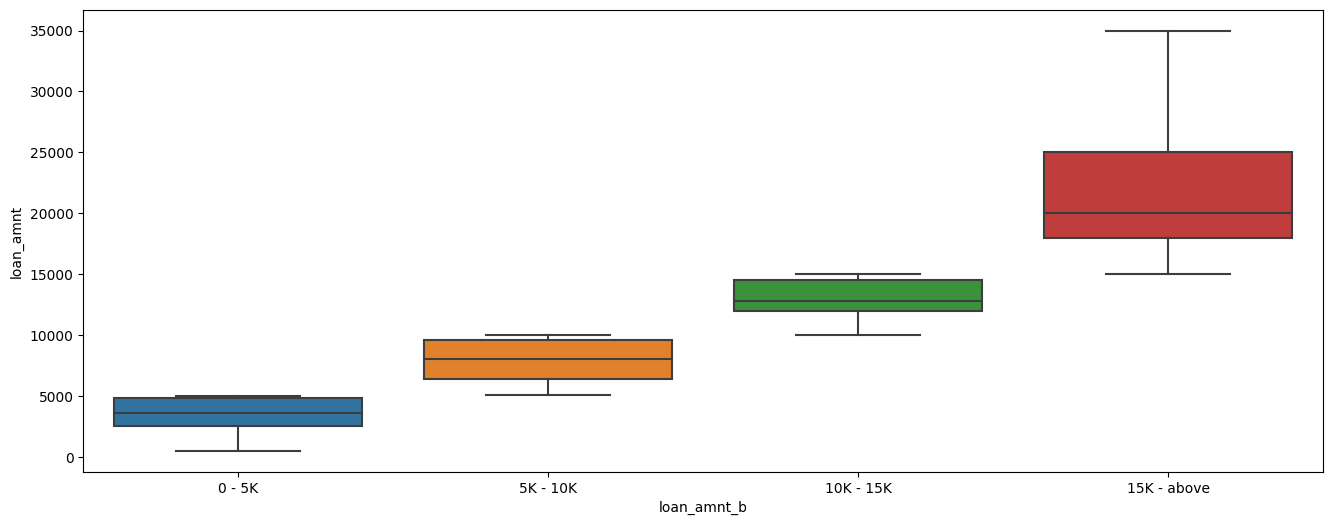

In [ ]:
# Validating Categories

plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.loan_amnt_b)
plt.show()

In [ ]:
loan['funded_amnt_inv'].describe()

count    36847.000000
mean     10430.400868
std       7008.919433
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [ ]:
# Bucketting Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['funded_amnt_inv_b'] = loan.apply(lambda x : bucket_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)

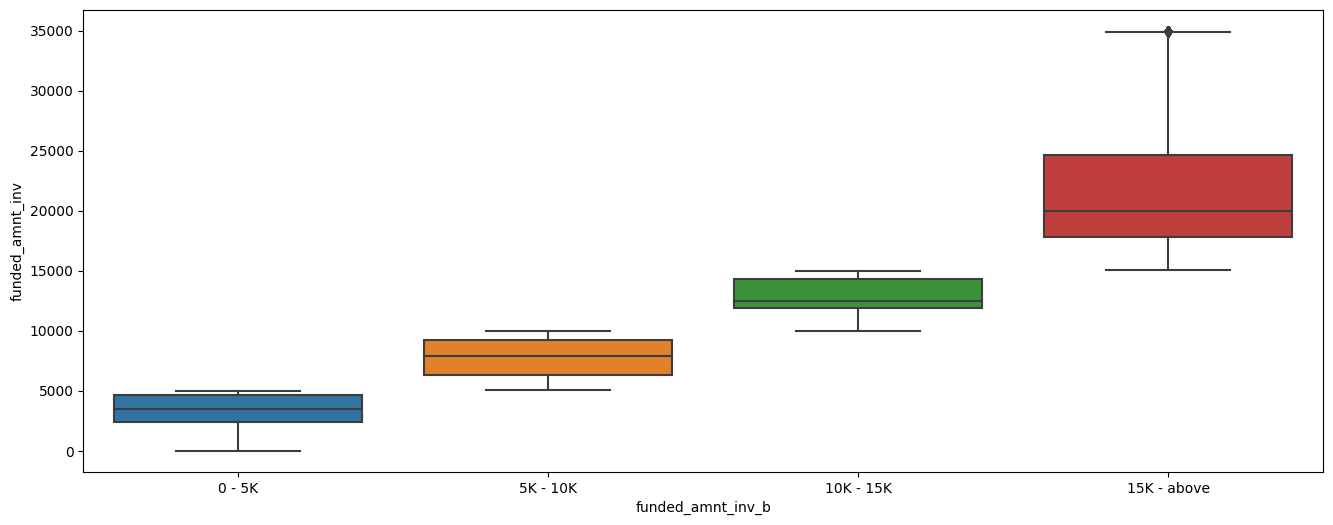

In [ ]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.funded_amnt_inv,x=loan.funded_amnt_inv_b)
plt.show()

In [ ]:
loan['funded_amnt'].describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [ ]:
# Bucketting Funded Amount
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['funded_amnt_b'] = loan.apply(lambda x : bucket_funded_amnt(x['funded_amnt']), axis = 1)

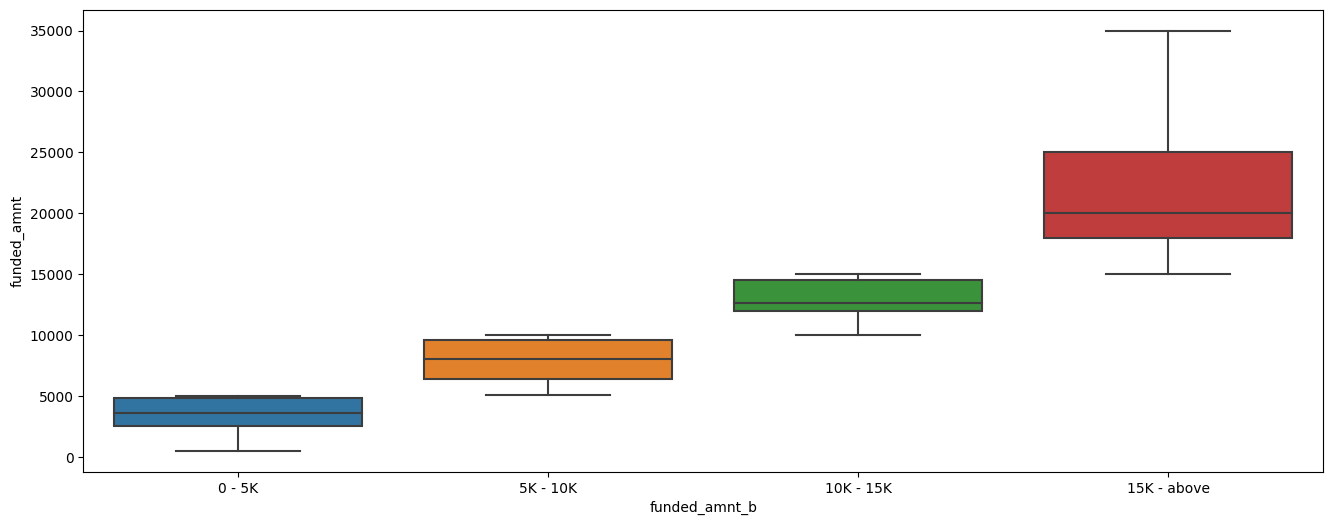

In [ ]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.funded_amnt,x=loan.funded_amnt_b)
plt.show()

In [ ]:
loan['annual_inc'].describe() / 1000

count      36.847000
mean       69.404482
std        64.027473
min         4.000000
25%        41.004000
50%        60.000000
75%        83.000000
max      6000.000000
Name: annual_inc, dtype: float64

In [ ]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan['annual_inc_b'] = loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [ ]:
loan['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [ ]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['int_rate_b'] = loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

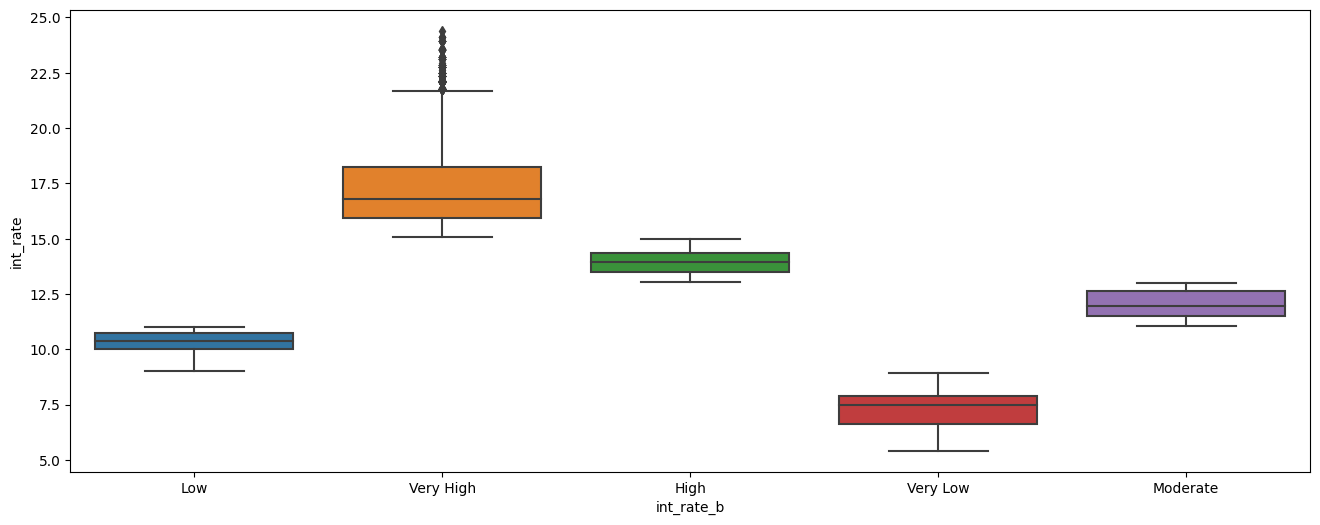

In [ ]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.int_rate,x=loan.int_rate_b)
plt.show()

In [ ]:
loan['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [ ]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['dti_b'] = loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

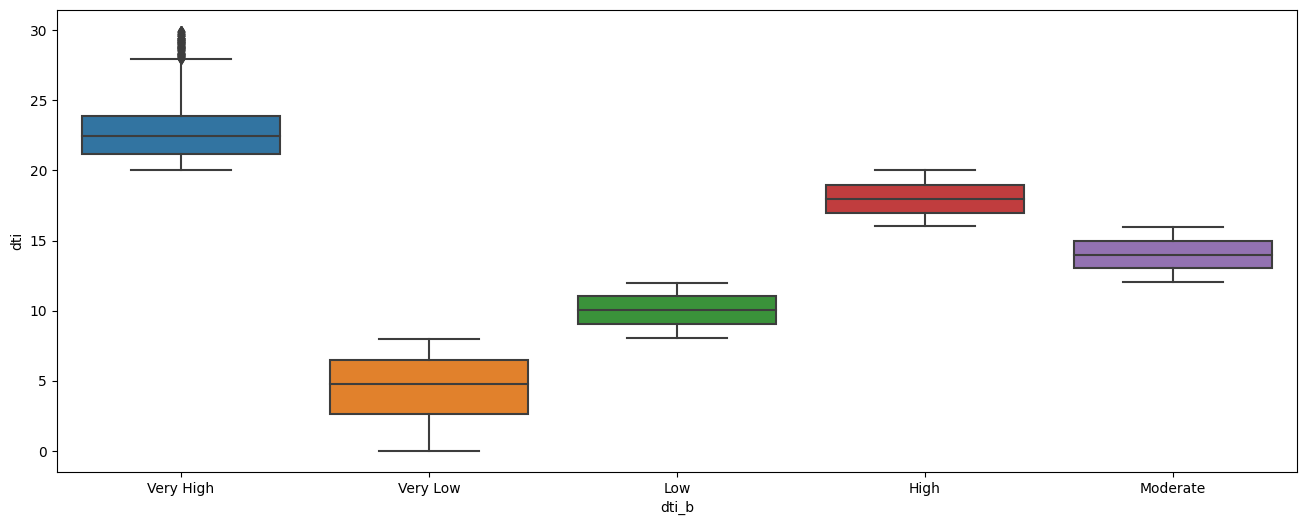

In [ ]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.dti,x=loan.dti_b)
plt.show()

Data Analysis Post Cleanup

In [ ]:
# Printing column info to analyse missing values, empty values in a column
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  float64       
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status     

In [ ]:
loan.shape

(36847, 28)

In [ ]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'issue_q', 'loan_amnt_b', 'funded_amnt_inv_b', 'funded_amnt_b',
       'annual_inc_b', 'int_rate_b', 'dti_b'],
      dtype='object')

<Axes: xlabel='loan_status', ylabel='count'>

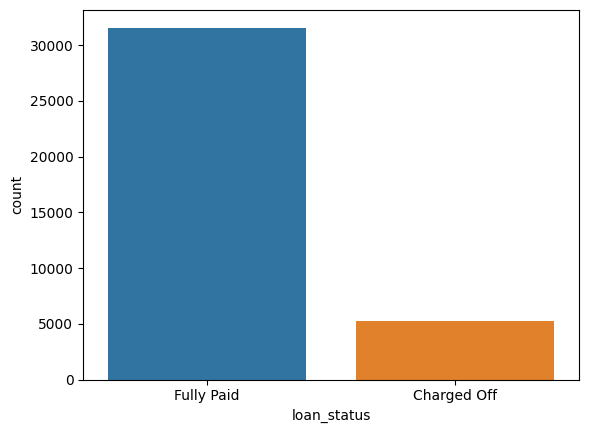

In [ ]:
sns.countplot(x = 'loan_status', data = loan)

Univeriate Analysis

In [66]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}


Common Functions

In [72]:
# This function creates a dictionary of outliers which includes the inter quartile range,
# lower and upper bound for a particular column.
# Formulae used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}
# The function treat outliers, prints a box plot for each column under consideration
# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
# Also prints statistics of how many rows and percentage of rows dropped
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plt.subplots(1,2,figsize=(14, 3))
    splot1 = sns.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers
    splot2 = sns.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plt.tight_layout()
    plt.show()

def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [73]:
def univariate_analysis(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

In [112]:
# Bivariate analysis of columns against loan_status and calculate the ratio of Charge Offs
def analysis_vs_loan_status(df, col):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    splot = sns.countplot(df[col], ax=p[0])
    splot.set_xticklabels(splot.get_xticklabels(), rotation=90);
    p[0].set_title('['+ col + '] - loan_status=all')
    cross_tab = pd.crosstab(df[col], df['loan_status'], normalize='index')
    cross_tab.plt.bar(ax=p[1], stacked=True)
    p[1].set_title('['+ col + '] - Stacked')
    plt.show()


def continious_column_analysis(df, column):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=ax1)
    sns.boxplot(x=column, y='loan_status', data=df, ax=ax2)
    ax1.set_xlabel(column_titles[column])
    ax2.set_xlabel(column_titles[column] + 'by Loan Status')
    plt.tight_layout()
    plt.show()
    # return group by dataframe for display comparison
    return df.groupby('loan_status')[column].describe()

def comparison_loan_status(df, column):
    df.groupby('loan_status')[column].value_counts().unstack().plt(kind='bar', figsize=[16,4])
    plt.show()
def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plt.figure(figsize=[20,8])
    plt.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sns.barplot(x=rw['charge_off_ratio'], y=rw[column])
    else:
        sns.barplot(x=rw[column], y=rw['charge_off_ratio'])
    plt.tight_layout()
    plt.show()
    return rw



def series_plot(df, column, hue=None, annot=1):
        temp = pd.Series()
        fig, ax = plt.subplots(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue)
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
        del temp
        plt.show()

Outlier Treatment

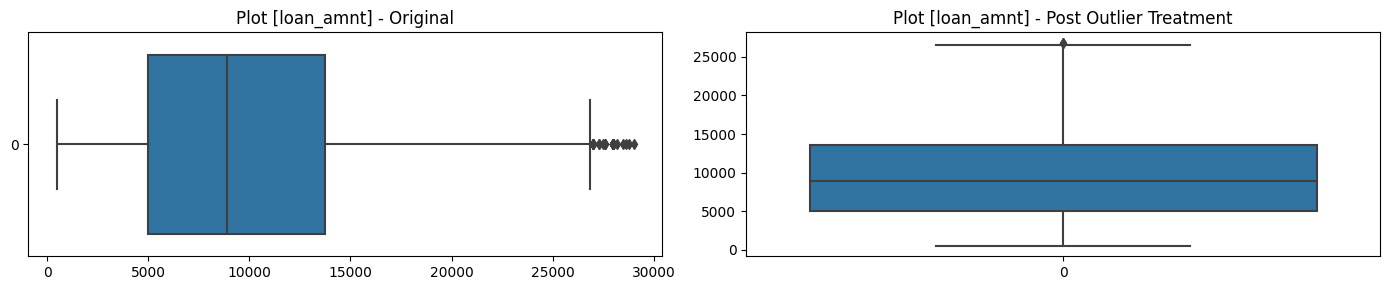

Rows dropped:  39
Percentage rows dropped:  0.12 %


KeyError: ignored

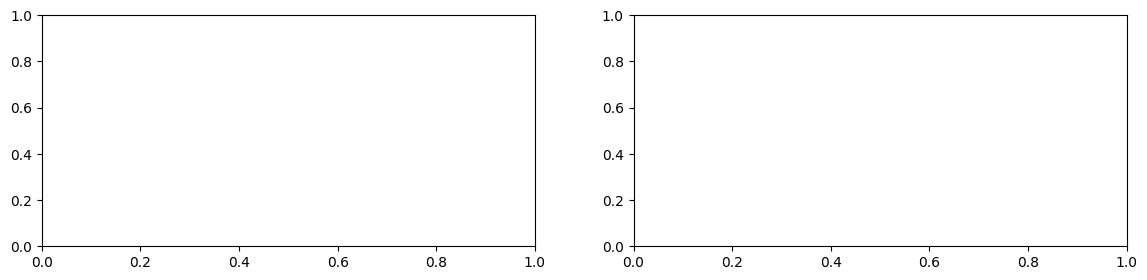

In [113]:
original_row_count = len(loan)

outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
for column in outlier_treatment:
    outlier_comparison(loan, column)
    loan = drop_outlier(loan, column)


In [76]:
new_row_count = len(loan)
print('Rows dropped: ', original_row_count - new_row_count)
print('Percentage rows dropped: ', round((original_row_count - new_row_count)/original_row_count*100,2), "%")

Rows dropped:  3791
Percentage rows dropped:  10.29 %


Quantitative Variable Analysis

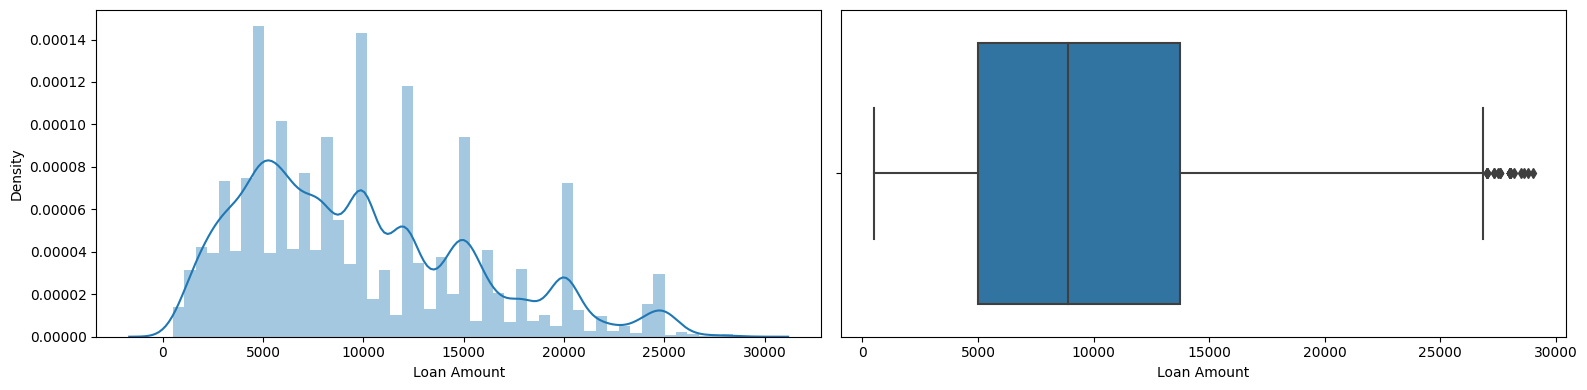

In [77]:
univariate_analysis(loan, 'loan_amnt')

Majority of the loan_amount is in the range of 5K to 14K


funded_amnt

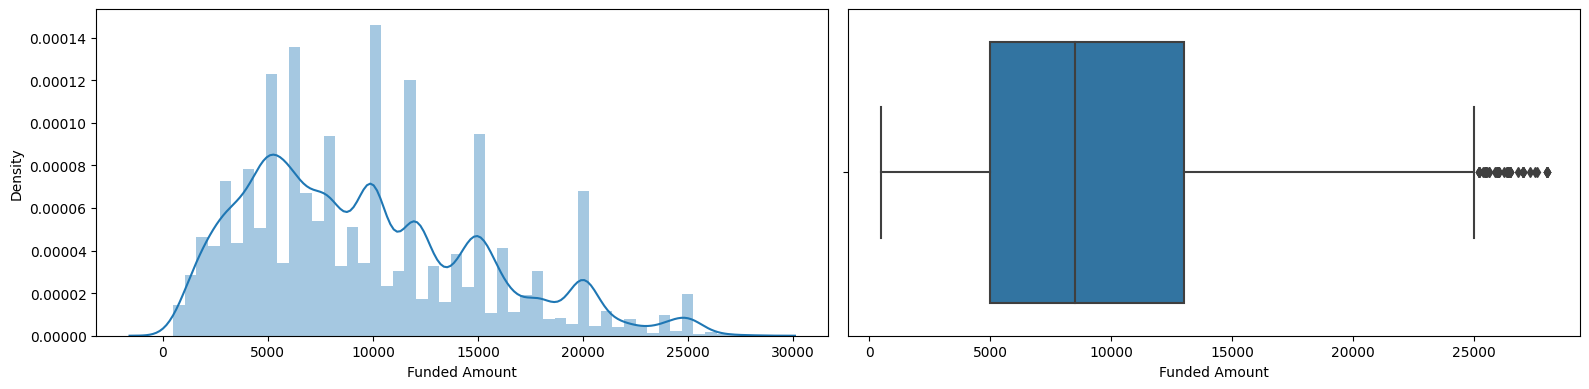

In [78]:
univariate_analysis(loan, 'funded_amnt')

Majority of the funded_amnt is in the range of 5K to 13K

funded_amnt_inv

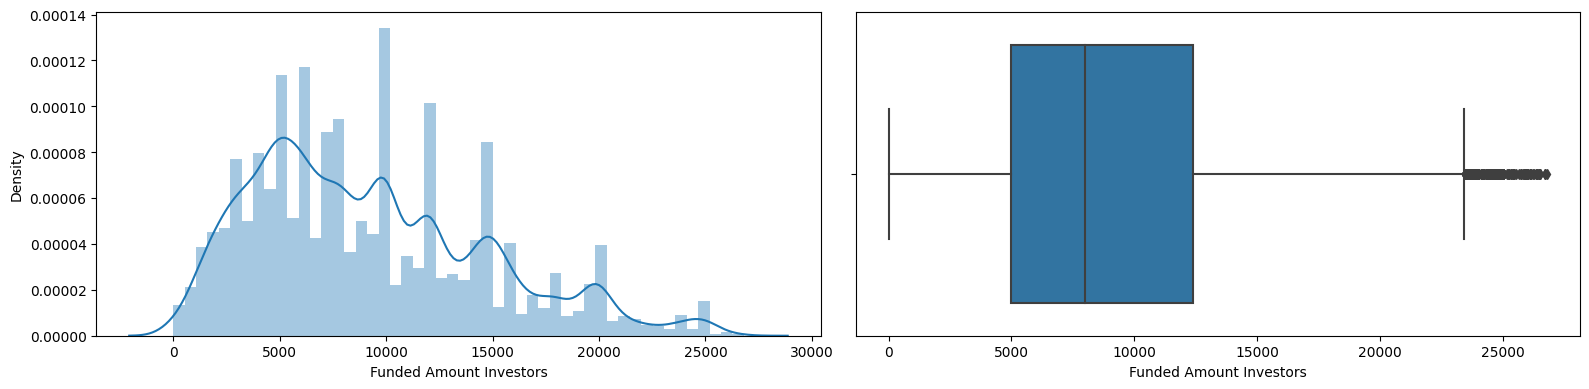

In [79]:
univariate_analysis(loan, 'funded_amnt_inv')

Majority of the funded_amnt_inv is in the range of 5K to 12K


int_rate

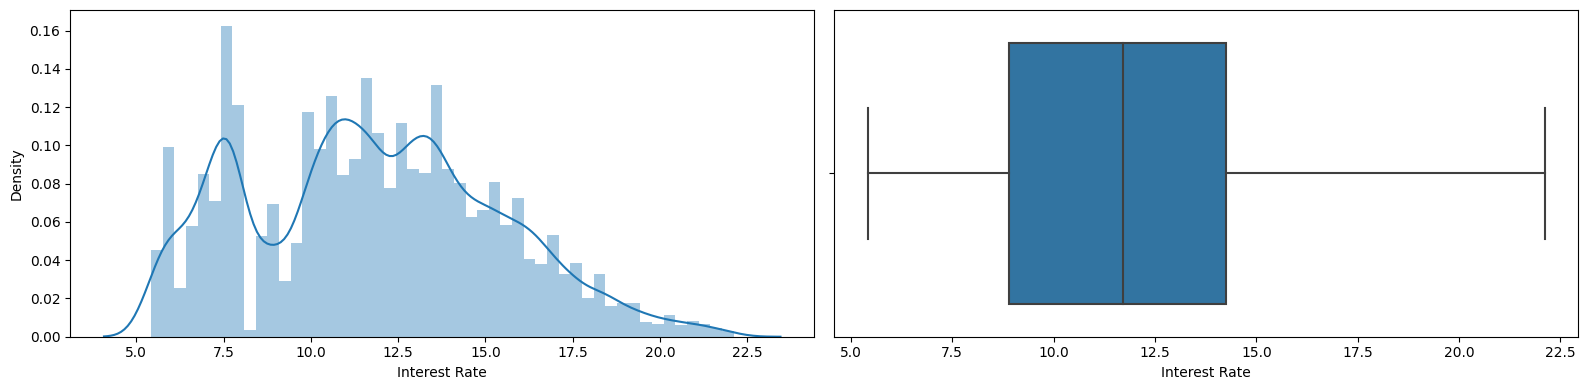

In [80]:
univariate_analysis(loan, 'int_rate')

Majority of the interest rate is in the range of 5% to 16% going at the max to 22%

installment

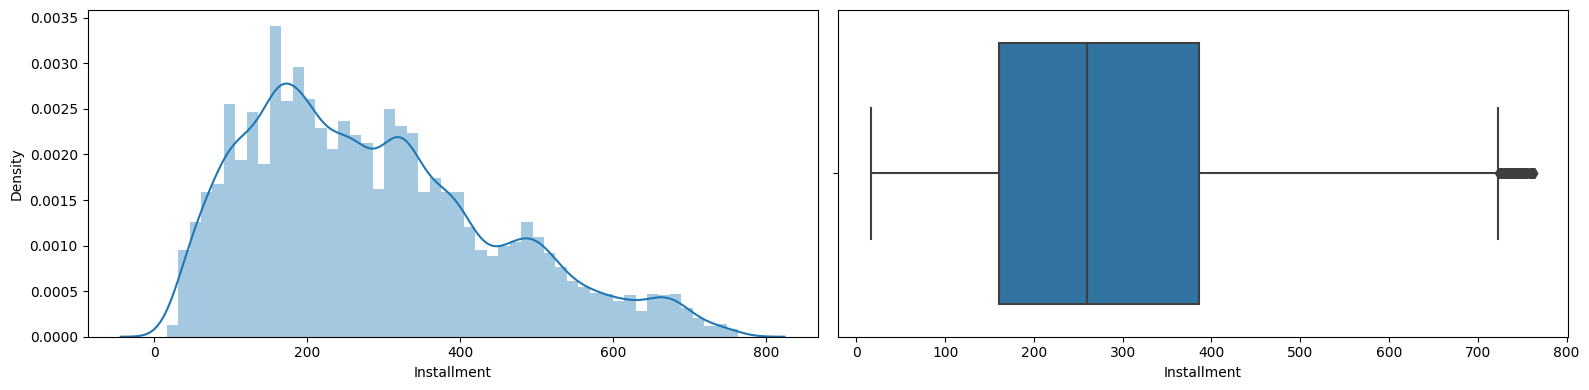

In [81]:
univariate_analysis(loan, 'installment')

Majority of the installment is in the range of 20 to 400 going at the max to 700

annual_inc

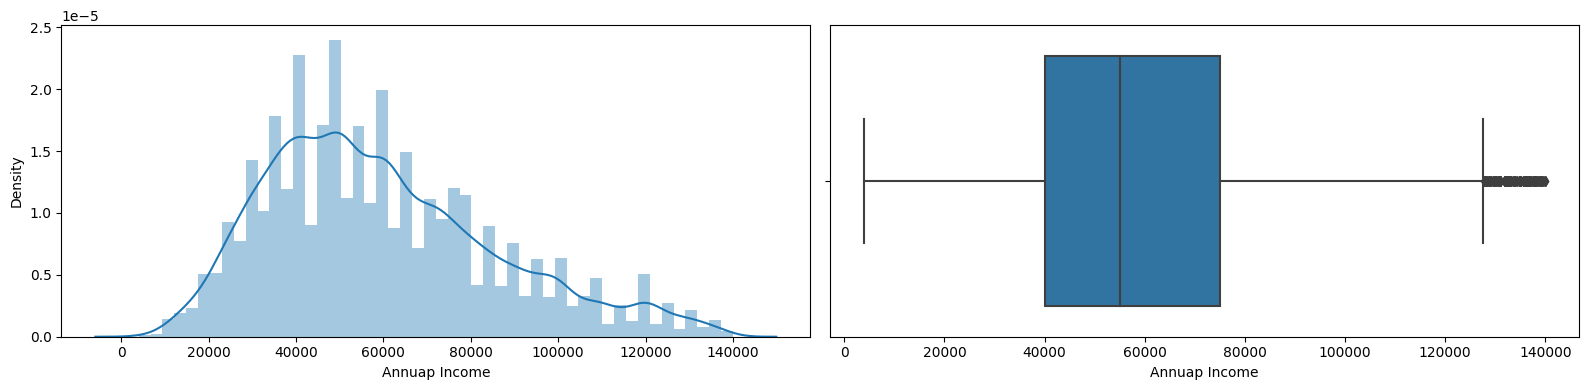

In [82]:
univariate_analysis(loan, 'annual_inc')

Unordered Categorical Variable Analysis

home_ownership

<Axes: >

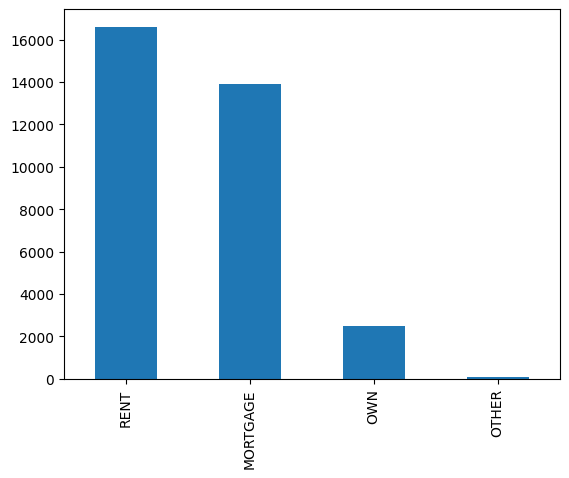

In [83]:
loan['home_ownership'].value_counts().plot.bar()

Majority of the home owner status are in status of RENT and MORTGAGE

purpose

<Axes: >

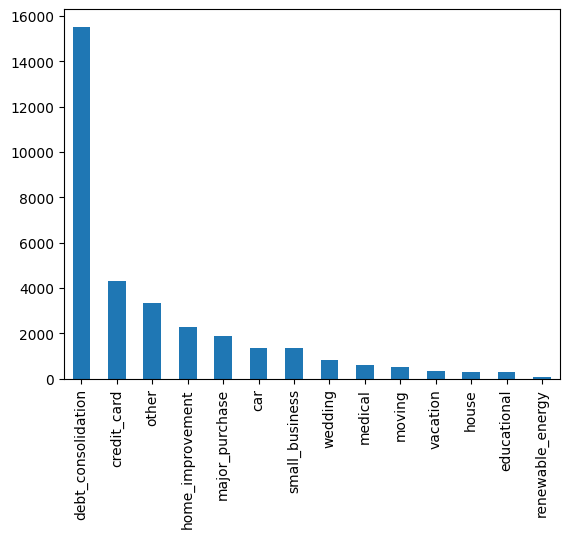

In [84]:
loan['purpose'].value_counts().plot.bar()

<Axes: >

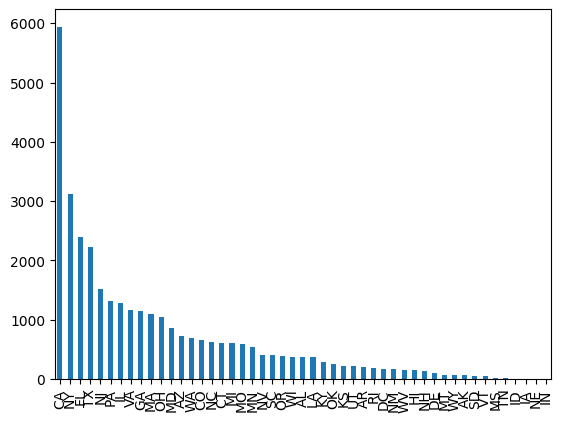

In [85]:
loan['addr_state'].value_counts().plot.bar()

Ordered Categorical Variable Analysis

Term

<Axes: >

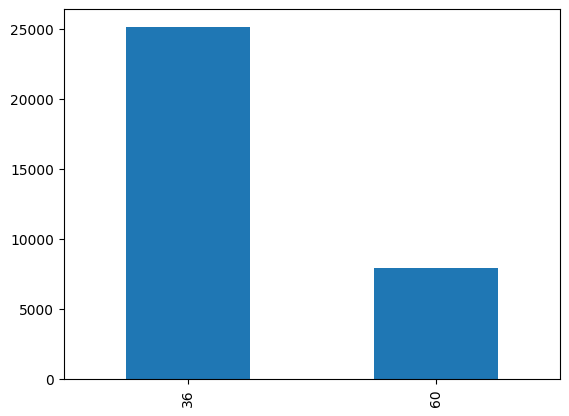

In [86]:
loan['term'].value_counts().plot.bar()

Grade

<Axes: >

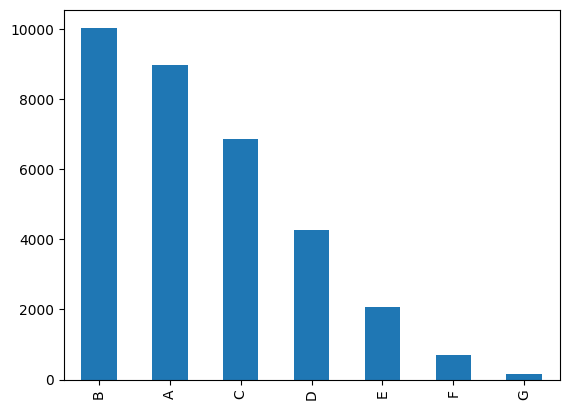

In [88]:
loan['grade'].value_counts().plot.bar()

pub_rec_bankruptcies

<Axes: >

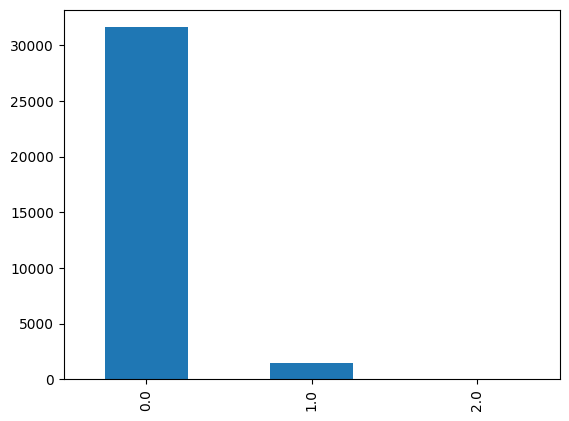

In [89]:
loan['pub_rec_bankruptcies'].value_counts().plot.bar()

Derived Variable Analysis

issue_y

<Axes: >

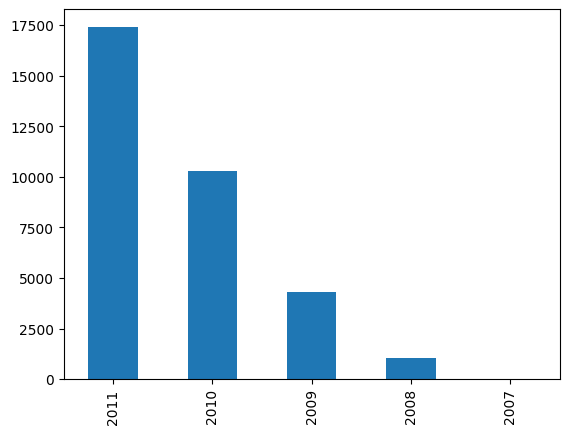

In [90]:
loan['issue_y'].value_counts().plot.bar()

issue_m


<Axes: >

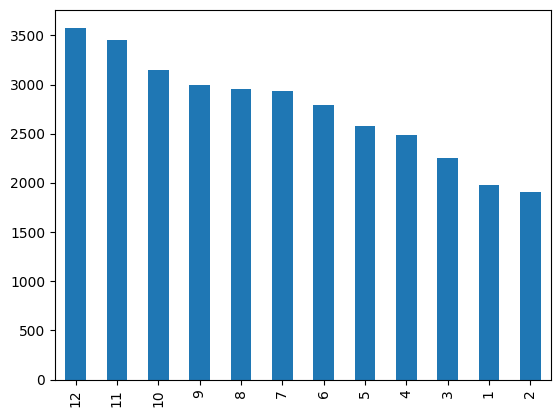

In [91]:
loan['issue_m'].value_counts().plot.bar()

issue_q

<Axes: >

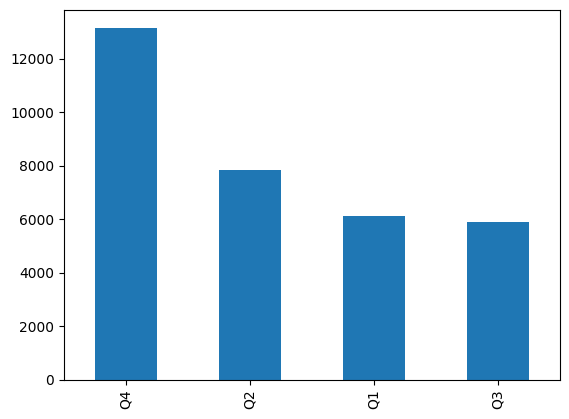

In [92]:
loan['issue_q'].value_counts().plot.bar()

Highest loan application volume in Quarter 4 of a year

loan_amnt_b

<Axes: >

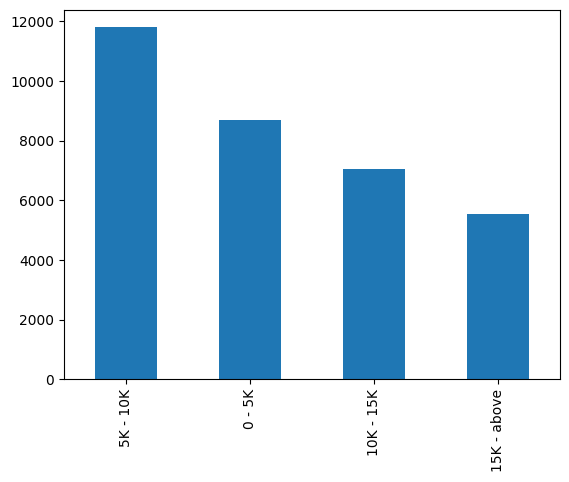

In [93]:
loan['loan_amnt_b'].value_counts().plot.bar()


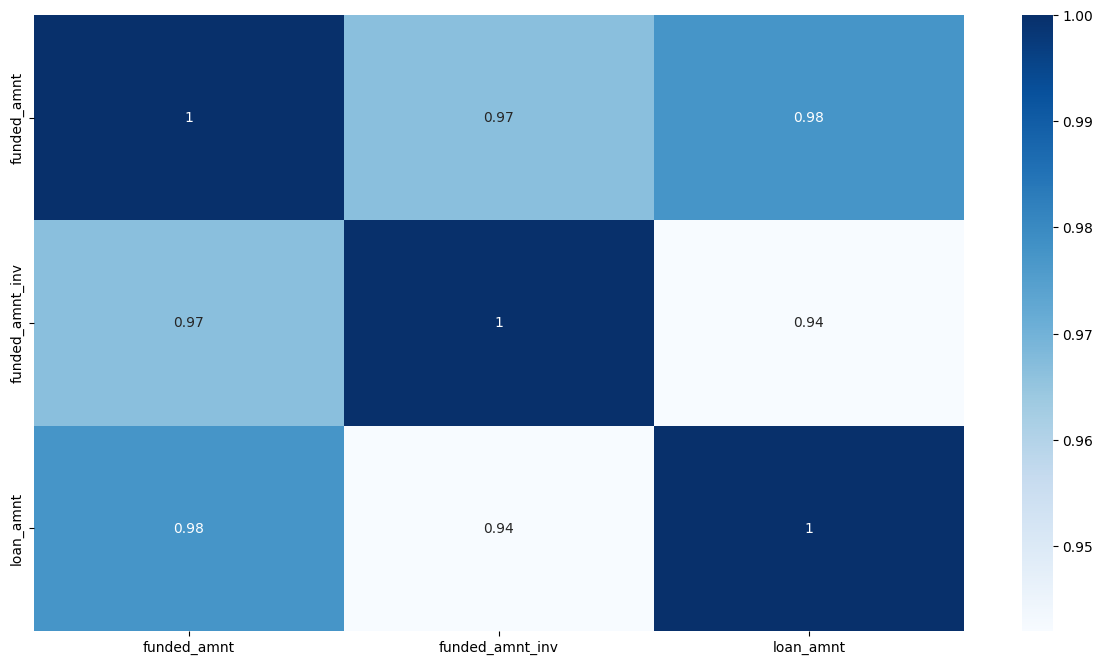

In [94]:
# Identifying key correlations
corr = loan.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap='Blues')
plt.show()

The loan_amt, funded_amt and funded_amt_inv may is highly positively correlated. dropping funded_amnt_inv and funded_amnt

In [96]:
#Dropping funded_amnt and funded_amnt_inv
loan = loan.drop(['funded_amnt_inv', 'funded_amnt'],  axis=1)

annual_inc_b

<Axes: >

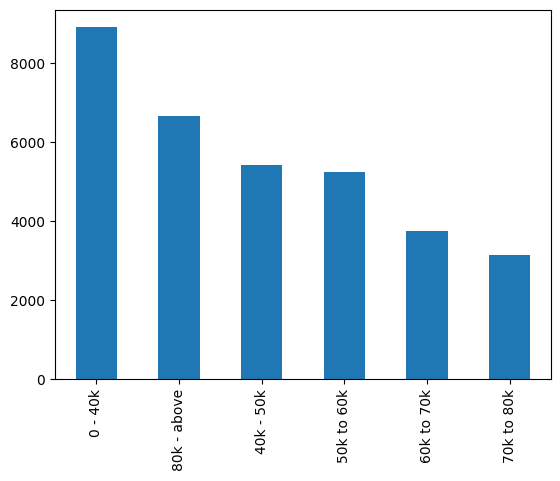

In [97]:
loan['annual_inc_b'].value_counts().plot.bar()

## Univariate Analysis Summary

# Customer Demographics

*   Majority of the loan applicants are in the range of 0 - 40K
annual income
*   Majority of the debt to income is in the range of 0 to 20 going at the max to 30


*   Majority of the home owner status are in status of RENT and MORTGAGE
*   Highest loan applications are in the category of debt_consolidation


*   Majority of the home owner status are in status of RENT and MORTGAGE

*   Highest loan applications are in the category of debt_consolidation

*   CA (California) state has the maximum amount of loan applications
*   Majority of the loan applicants are in the category of not having an public record of bankruptcies


*   Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years

# Loan Demographics


*   Majority of the loan applicants are in the category of not having an public record of bankruptcies


*   Majority of the loan applicants are in the category of not having an public record of bankruptcies
*   Majority of the interest rate is in the range of 5% to 16% going at the max to 22%

*   Highest loan amount applications fall in the range of 5k to 10k
*   Majority of loan application counts fall under the catogory of Grade B
*   Majority of the installment amount is in the range of 20
*   Majority of the loan applications counts are in the term of 36 months





## Bivariate Analysis
# Analysis vs Charged Off Status
Identify causes and data which contribute to more Charge Off's

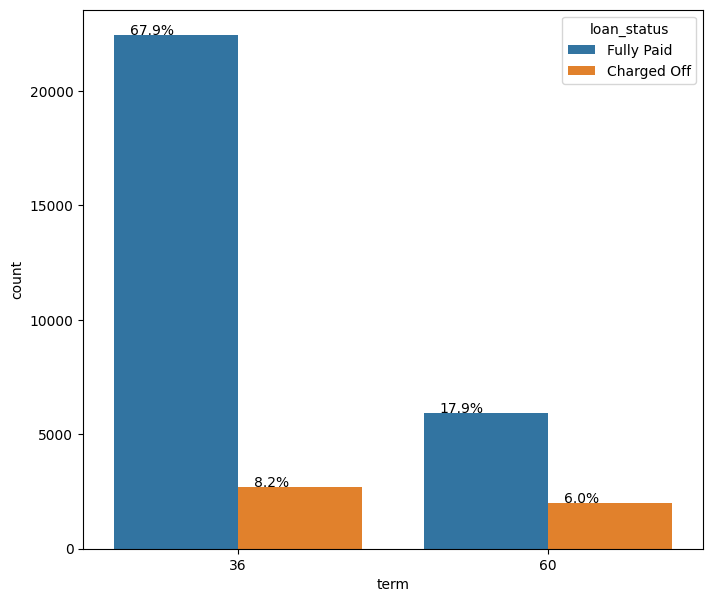

In [98]:
# Overall ratio of Charge Offs
series_plot(loan, 'term', 'loan_status')

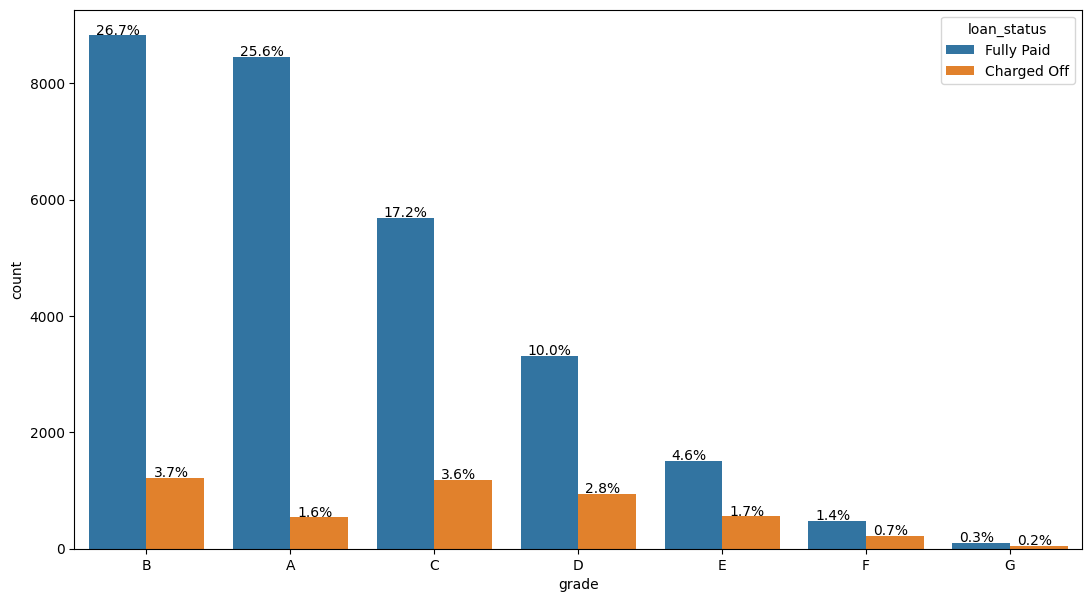

In [105]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'grade', 'loan_status')

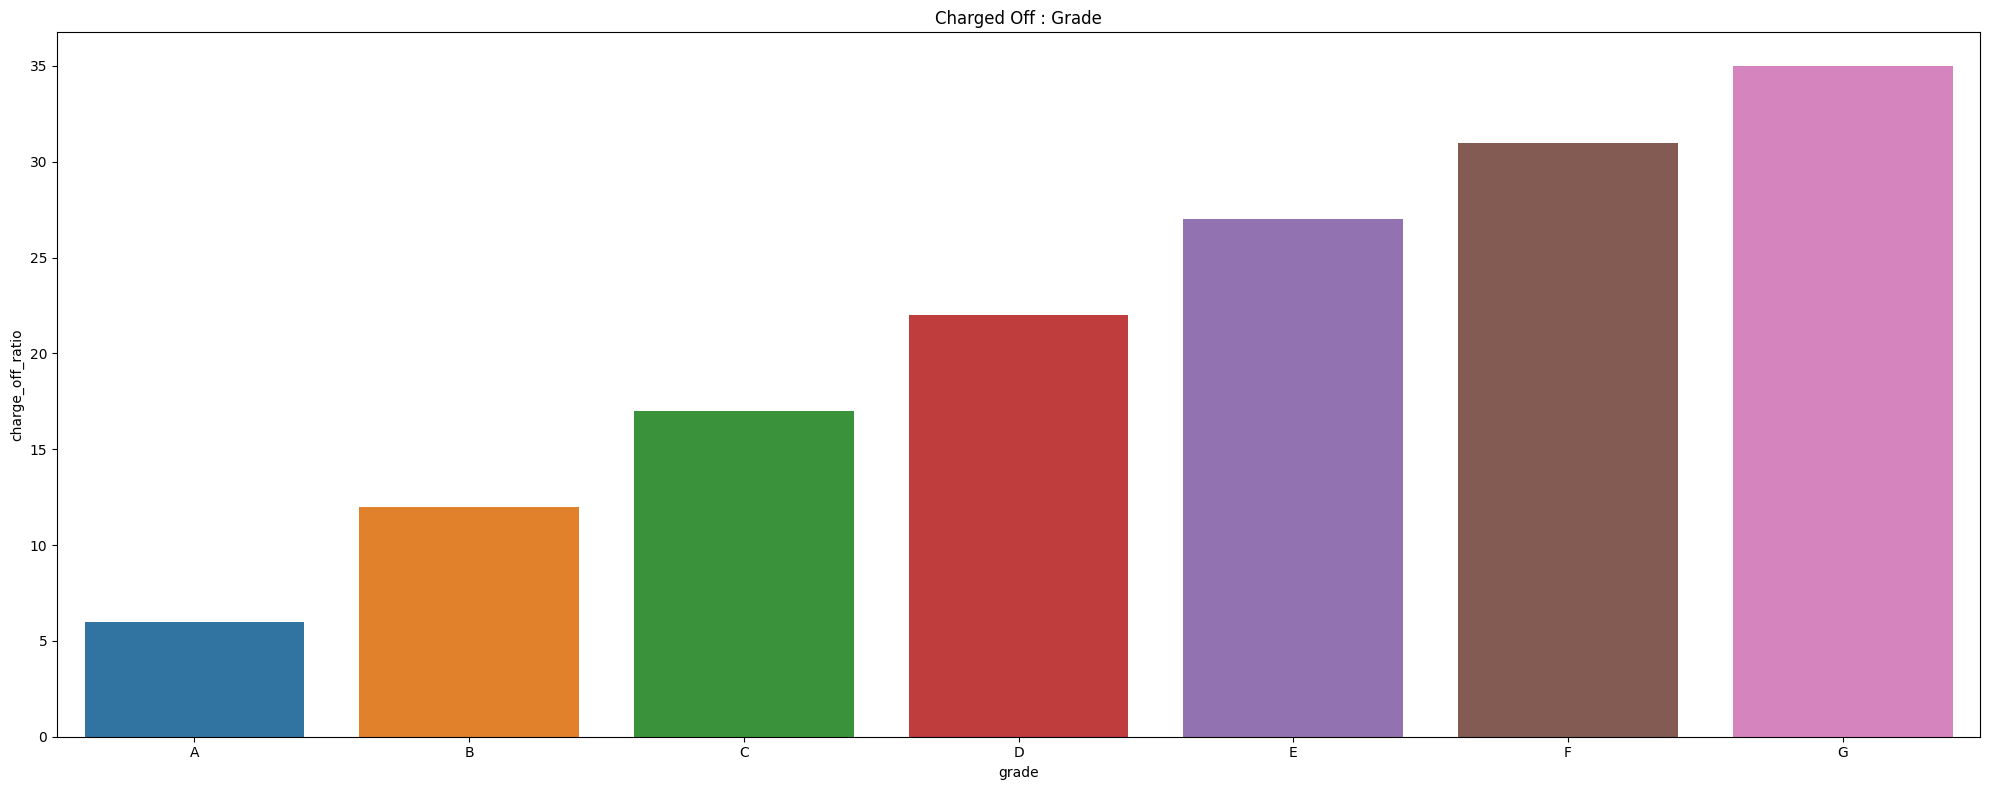

loan_status,grade,Charged Off,Fully Paid,total,charge_off_ratio
0,A,537,8449,8986,6.0
1,B,1221,8815,10036,12.0
2,C,1174,5682,6856,17.0
3,D,937,3307,4244,22.0
4,E,550,1496,2046,27.0
5,F,217,474,691,31.0
6,G,55,103,158,35.0


In [114]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'grade')

The Majority of loan volume is in grade=B
Highest percentage of overall Charge Offs are in grade B (3.7%) and C(3.6%)

If we analyse the Charge Off Ratio within a category
The highest percentage of Charge Offs are in the grade=G
Highest cluster of Charge Offs are in the grades G,F (> 30%)
The volume of Grade G is extremely low 158 thus it does not contribute to overall risk significantly

# Inferences
Highest risk of charge off's are in the grades of B and C
Grade "F" and "G" have very high chances of charged off. The columes are low

Grade "A" has very less chances of charged off.
Probablity of charged off is increasing from "A" to "G"

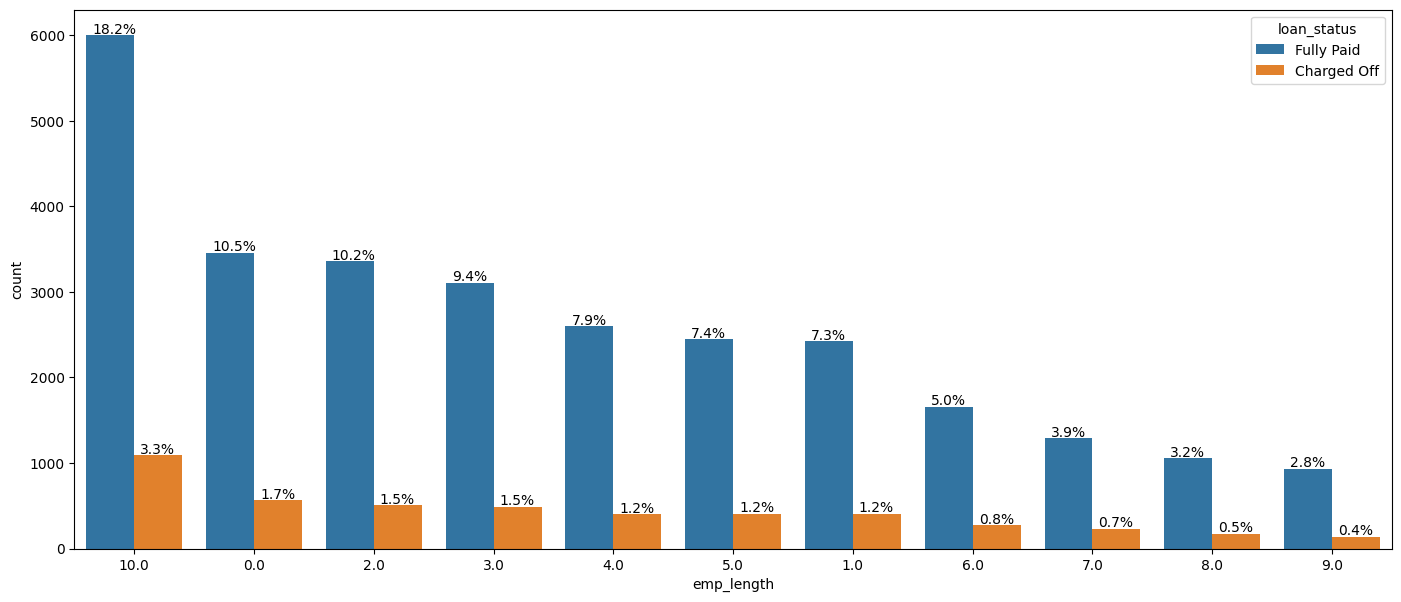

In [115]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'emp_length', 'loan_status')

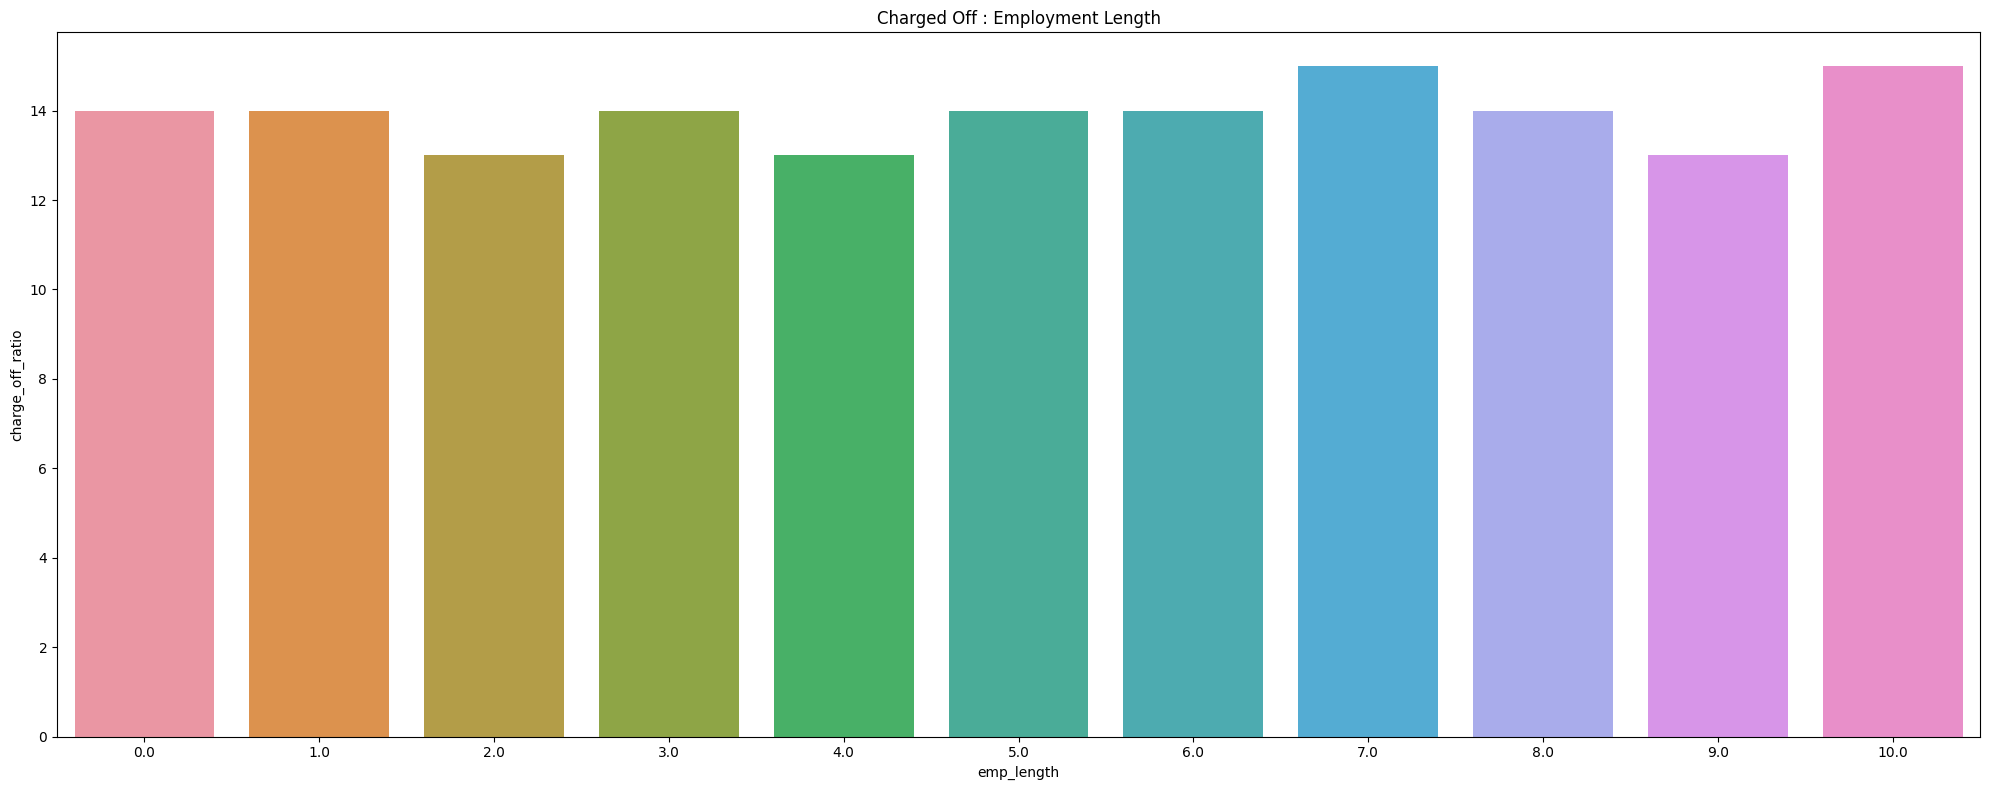

loan_status,emp_length,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,565,3458,4023,14.0
1,1.0,407,2426,2833,14.0
2,2.0,509,3358,3867,13.0
3,3.0,491,3107,3598,14.0
4,4.0,401,2595,2996,13.0
5,5.0,408,2445,2853,14.0
6,6.0,272,1657,1929,14.0
7,7.0,232,1292,1524,15.0
8,8.0,175,1056,1231,14.0
9,9.0,140,935,1075,13.0


In [116]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'emp_length')

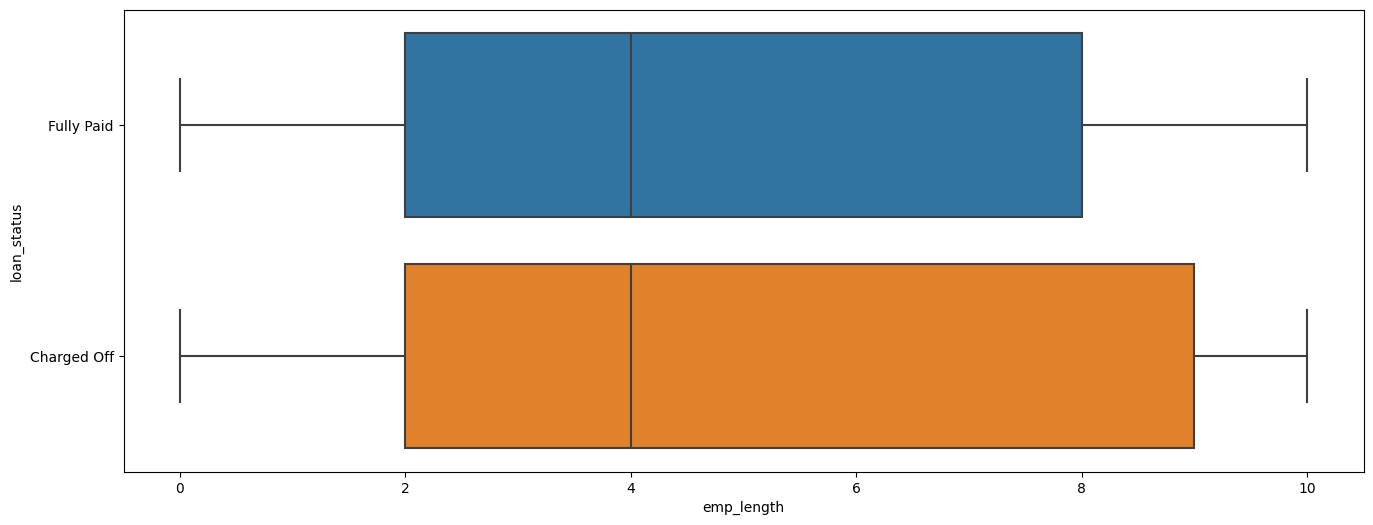

In [117]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_status,x=loan.emp_length)
plt.show()

Highest Charge Offs are in the employee length categoty of 10 Years and above

Charge Off ratio within the categories itself are similar and inconclusive

# Inferences
Highest Charge Offs are in the employee length of 10 Years and above
High probablity of Charge Off's whose income range is less than 1 years
Ratio within the ranges are pretty much same (in conclusive)

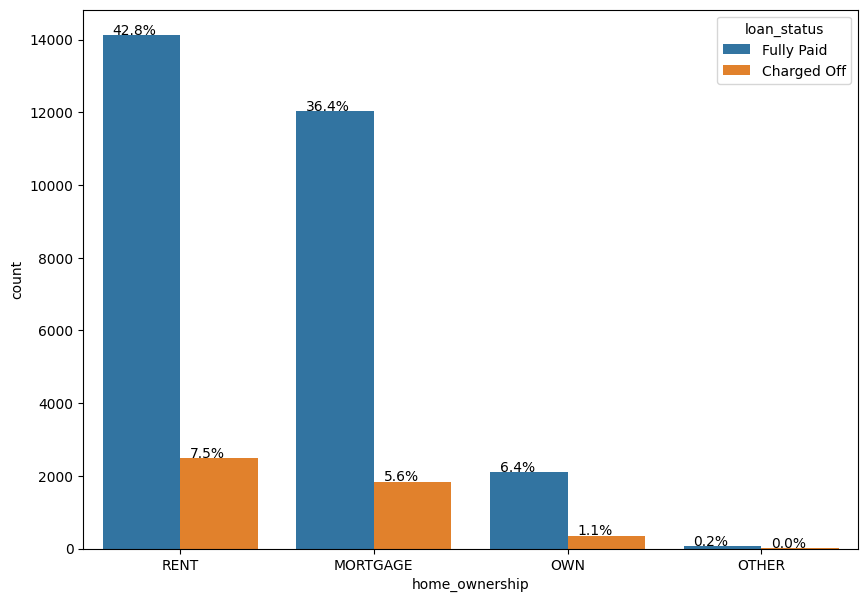

In [118]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'home_ownership', 'loan_status')

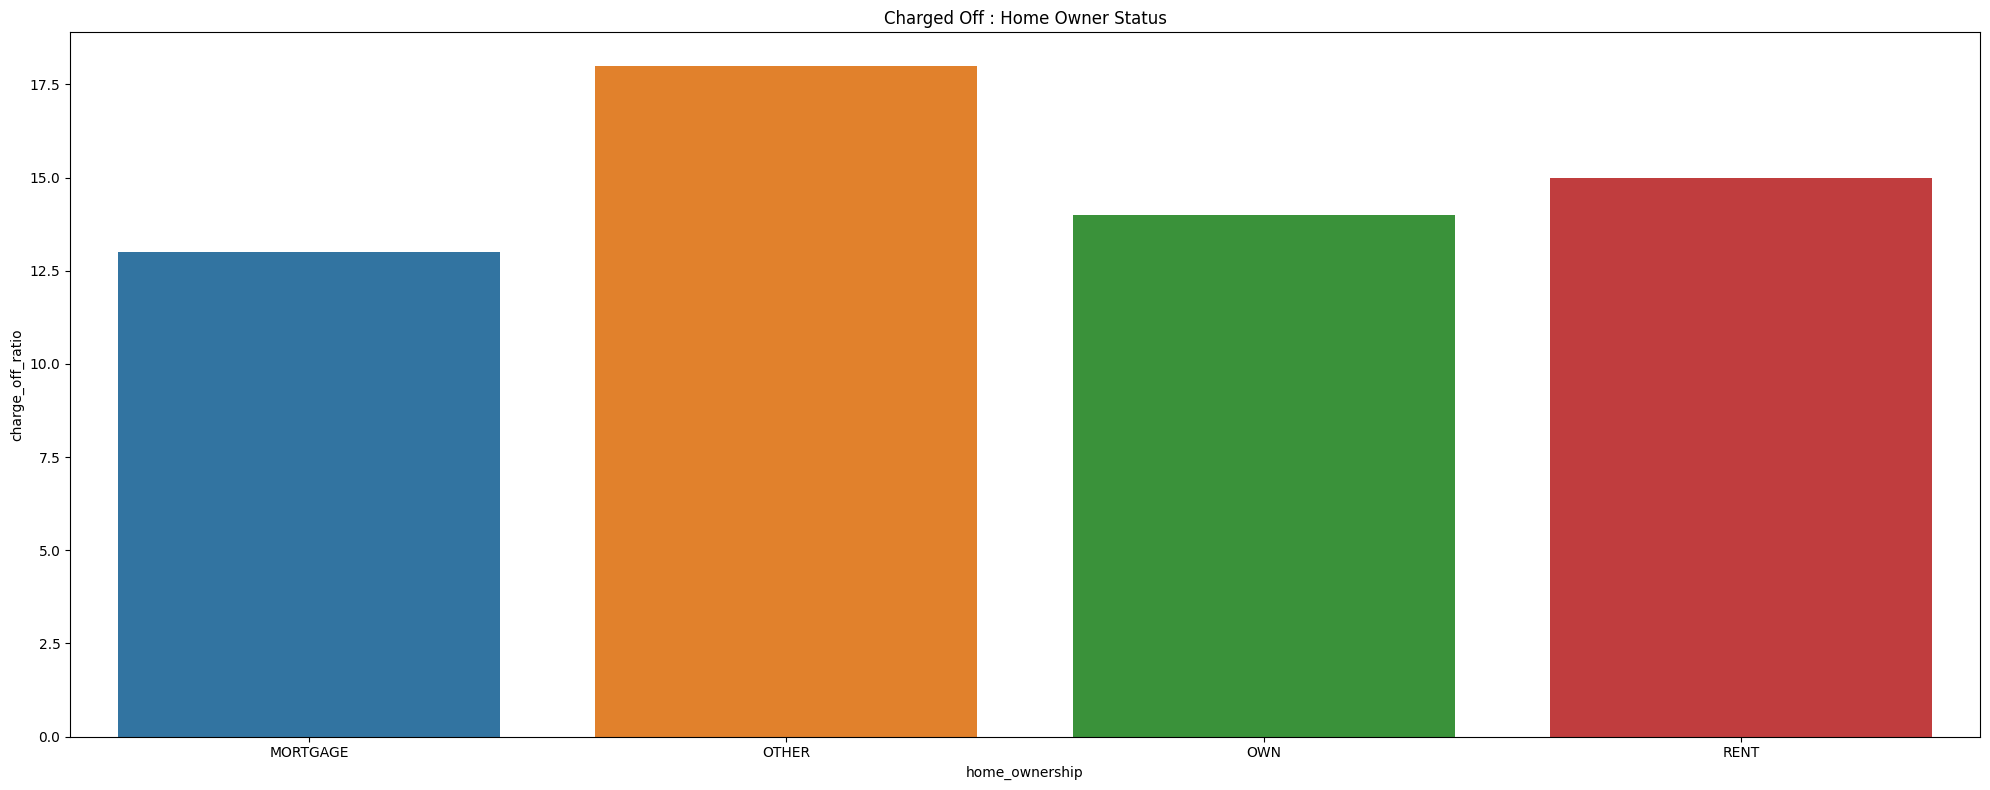

loan_status,home_ownership,Charged Off,Fully Paid,total,charge_off_ratio
0,MORTGAGE,1841,12025,13866,13.0
1,OTHER,16,73,89,18.0
2,OWN,354,2111,2465,14.0
3,RENT,2480,14117,16597,15.0


In [119]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'home_ownership')

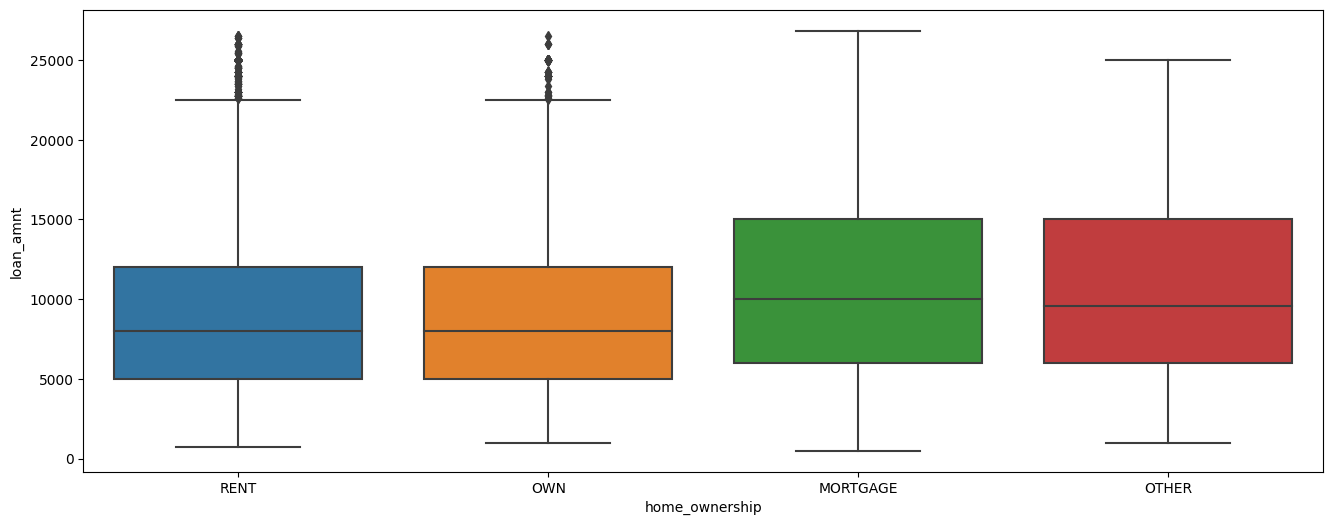

In [121]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.home_ownership)
plt.show()

Overall highest Charge Off numbers are in the category of RENT and MORTGAGE

Within each home_ownership category the ratio of Charge Off's for Other is higher

# Inferences
The home_ownership status of MORTGAGE and are at the highest risk of Charge Offs
MORTGAGE status also has the highest range of loan amounts increasing the risk

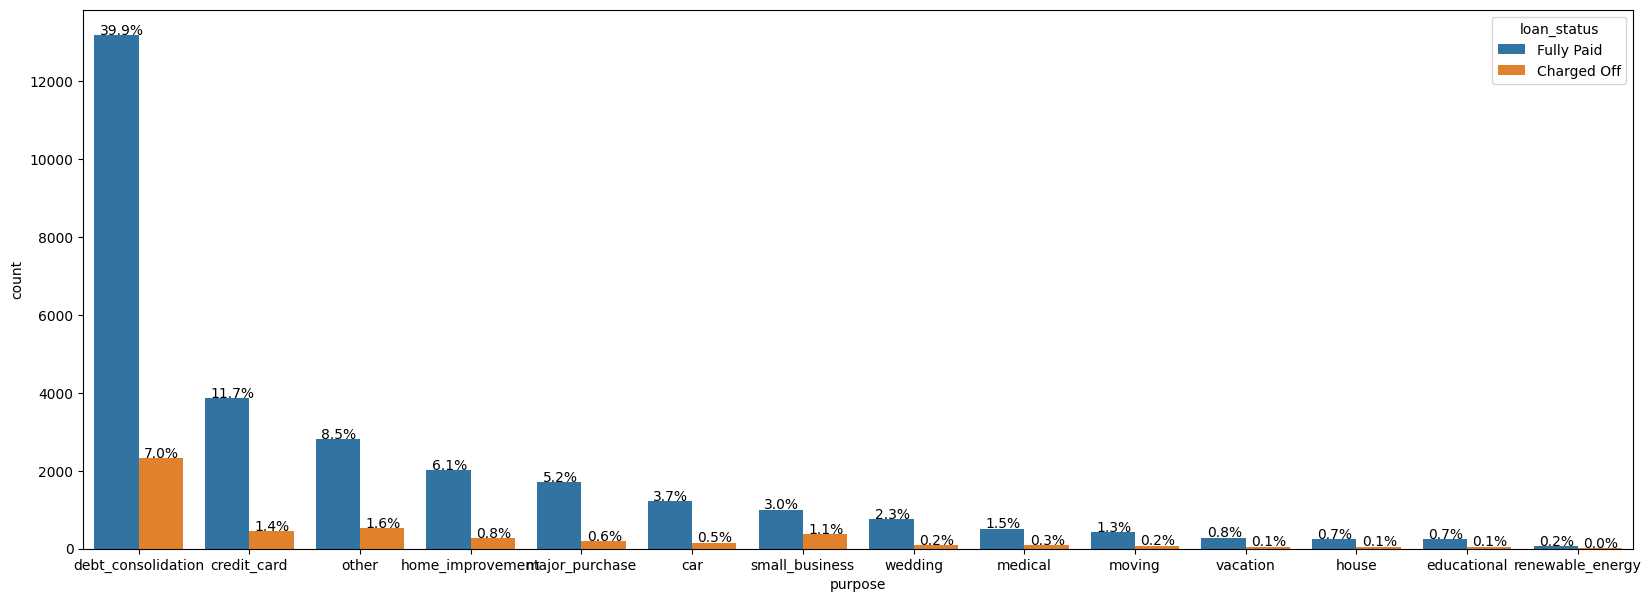

In [122]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'purpose', 'loan_status')

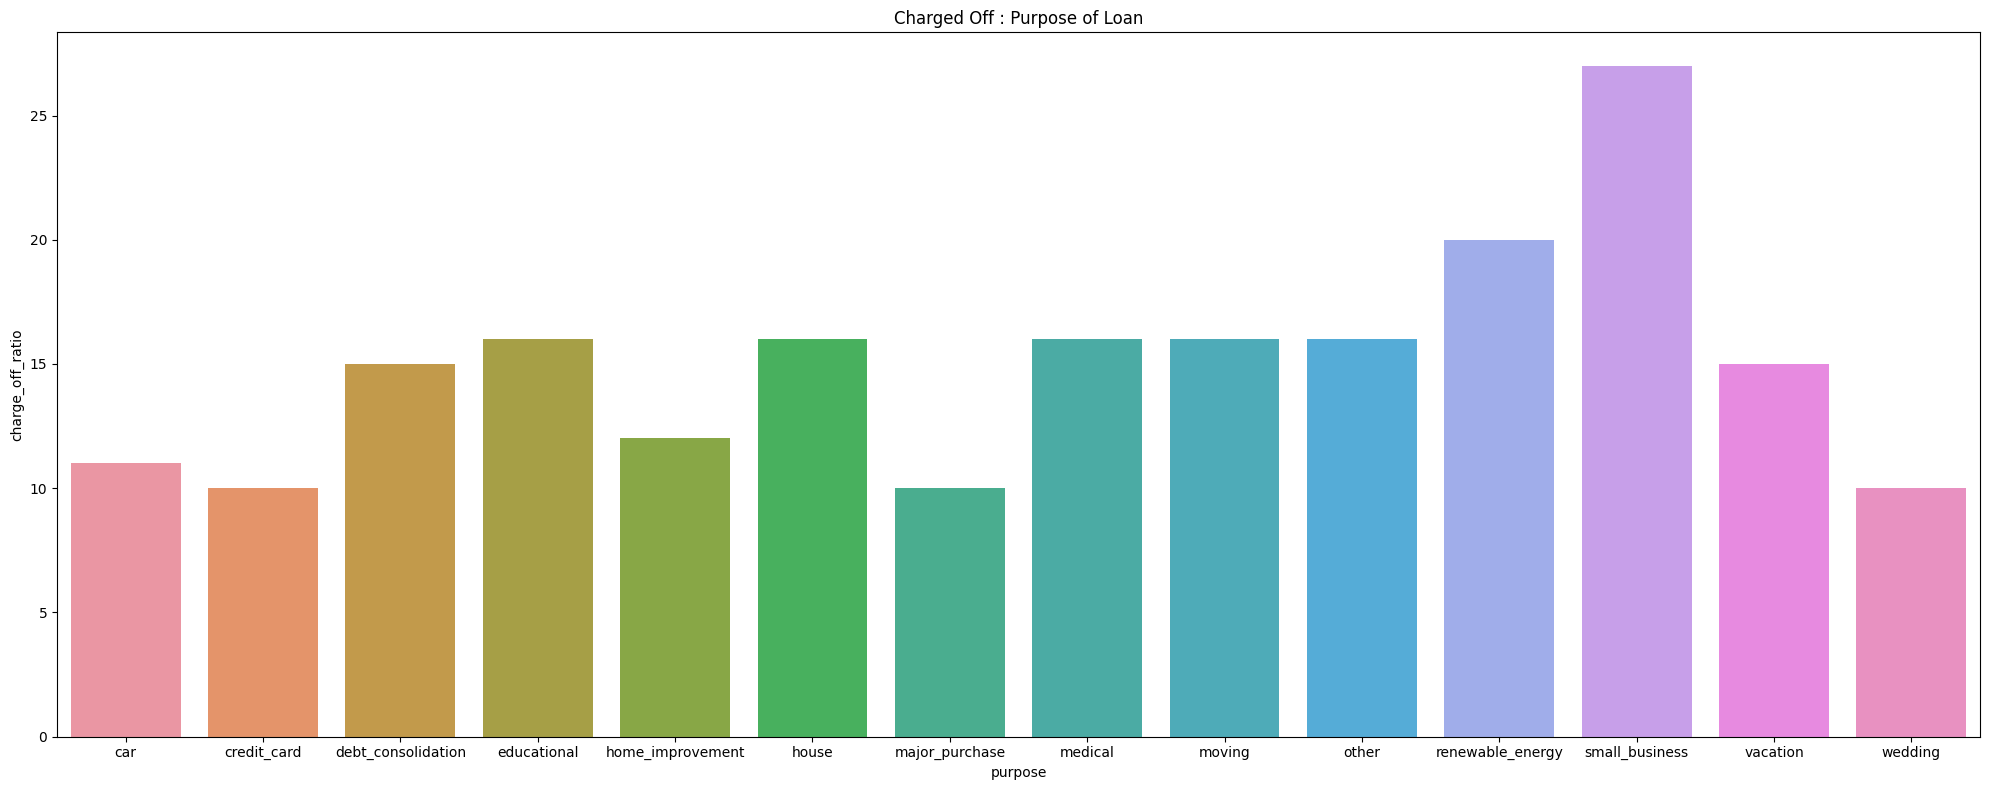

loan_status,purpose,Charged Off,Fully Paid,total,charge_off_ratio
0,car,150,1221,1371,11.0
1,credit_card,448,3864,4312,10.0
2,debt_consolidation,2317,13185,15502,15.0
3,educational,46,235,281,16.0
4,home_improvement,274,2011,2285,12.0
5,house,48,247,295,16.0
6,major_purchase,194,1710,1904,10.0
7,medical,95,509,604,16.0
8,moving,79,428,507,16.0
9,other,531,2818,3349,16.0


In [123]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'purpose')

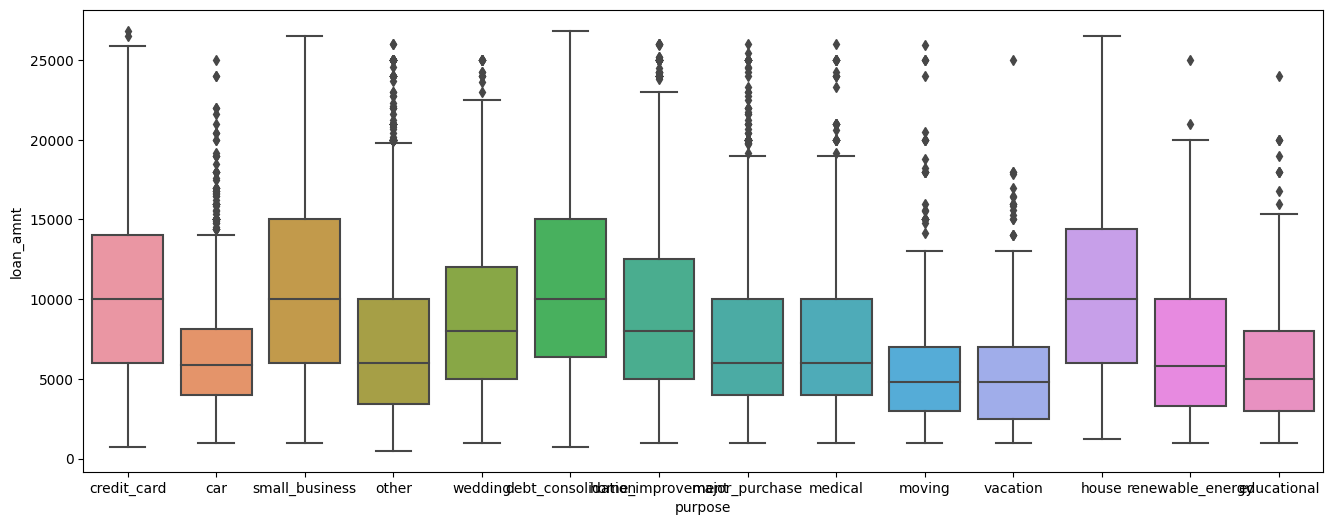

In [125]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.purpose)
plt.show()


Highest risk of Charge Offs are the category of debt_consolidation

Highest probablity of Charge Offs within a category are small_business but the volume is extremely low

Highest loan amount ranges are in small business, debt consolidation and house

# Inferences
Highest risk of Charge Off's are the purpose of debt_consolidation

Small Business applicants have high chances of getting charged off.

renewable_energy has lowest risk of Charge Off's in volume

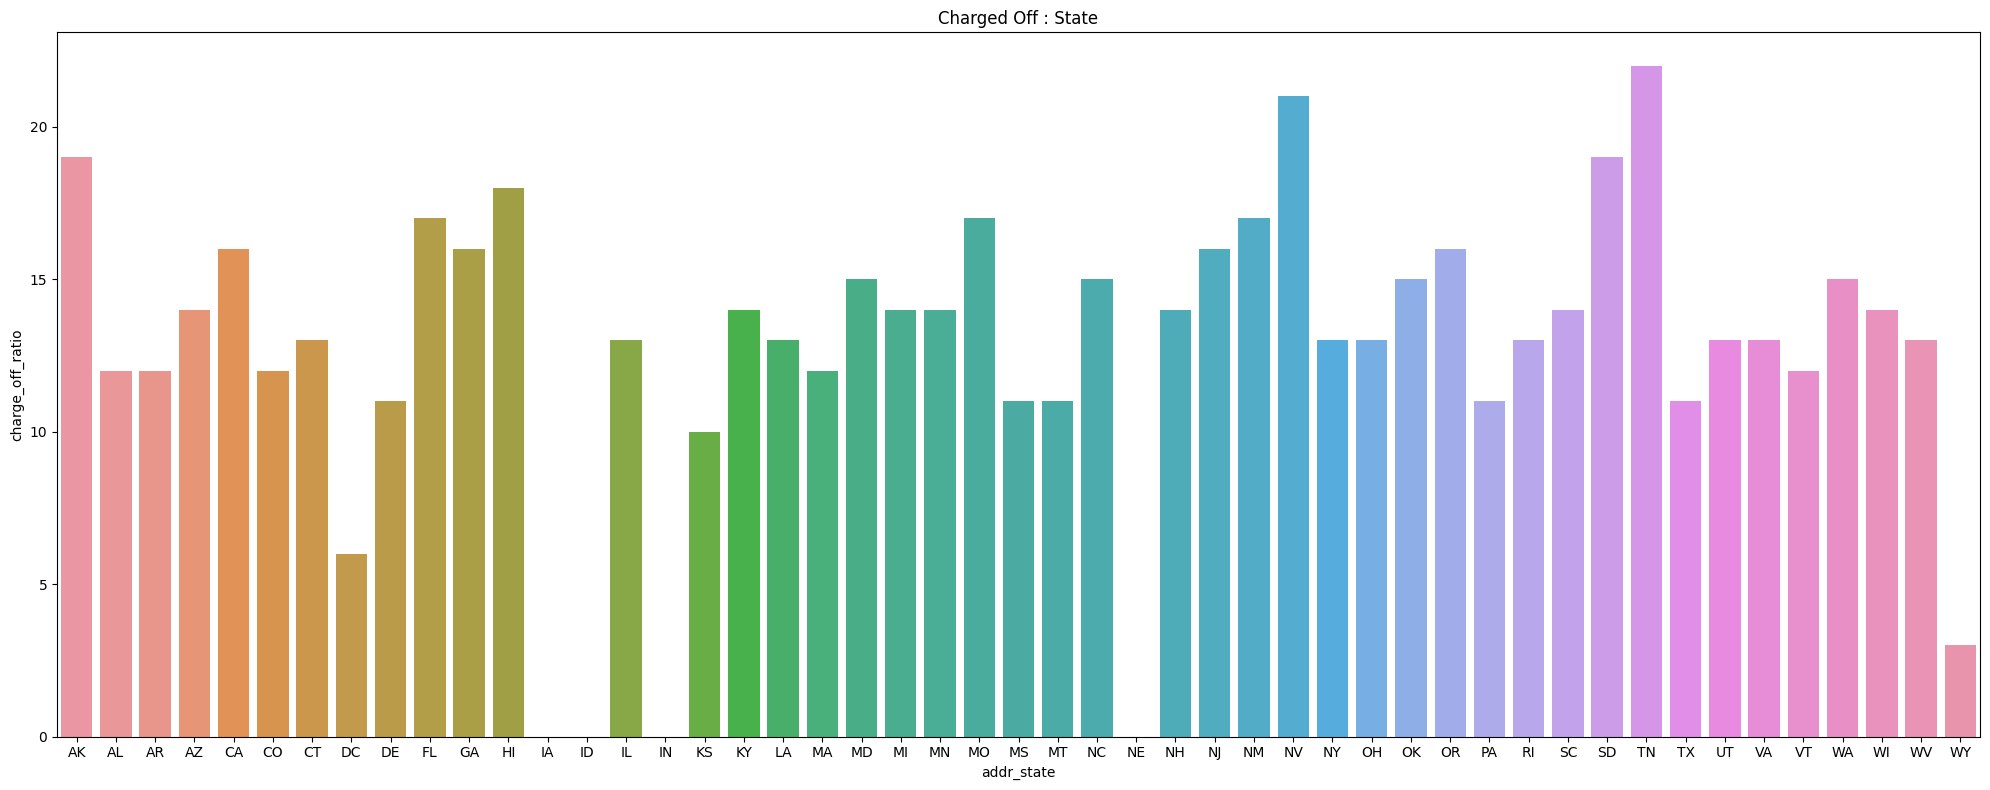

loan_status,addr_state,Charged Off,Fully Paid,total,charge_off_ratio
0,AK,12.0,51.0,63.0,19.0
1,AL,45.0,330.0,375.0,12.0
2,AR,25.0,183.0,208.0,12.0
3,AZ,103.0,617.0,720.0,14.0
4,CA,929.0,5003.0,5932.0,16.0
5,CO,77.0,576.0,653.0,12.0
6,CT,80.0,525.0,605.0,13.0
7,DC,10.0,162.0,172.0,6.0
8,DE,11.0,90.0,101.0,11.0
9,FL,413.0,1981.0,2394.0,17.0


In [126]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'addr_state')

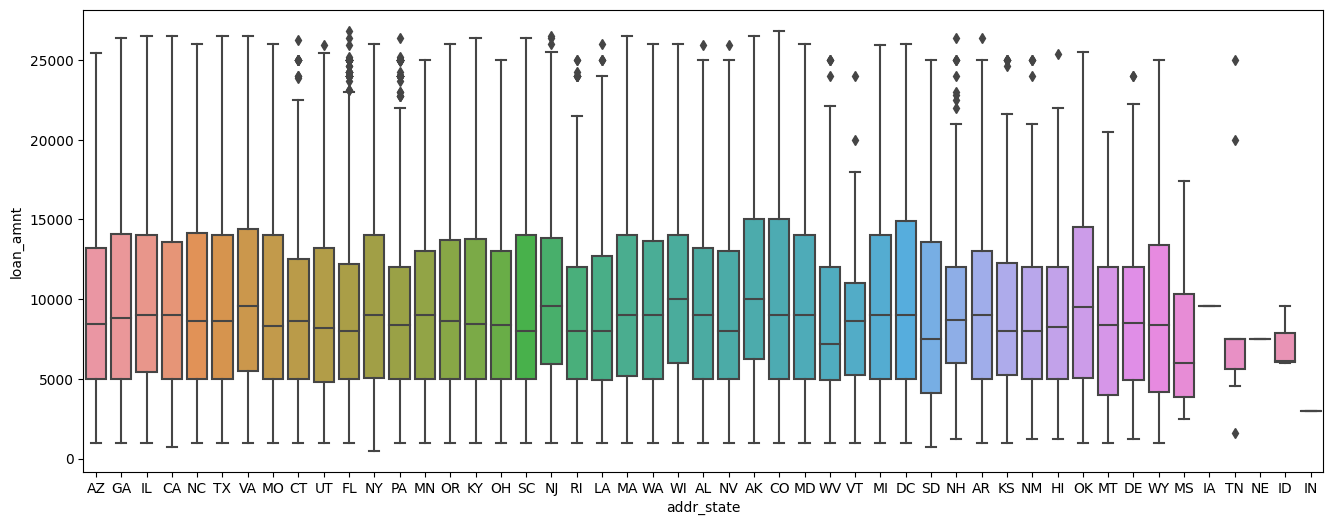

In [127]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.addr_state)
plt.show()

Highest volume of loans is from CA and purely based on volumes the hoghest Charge Off's are from CA

Within each state NE and NV has the highest Charge Offs
NE has very low volume this cannot be considered
Loan applications from NV will have high risk

# Inferences
Loan applications from NV (Neveda) have high risk of Charge Offs

NE has very high probablity of Charge Offs. Volume too low
NV,CA and FL have high percentage of Charge Off's

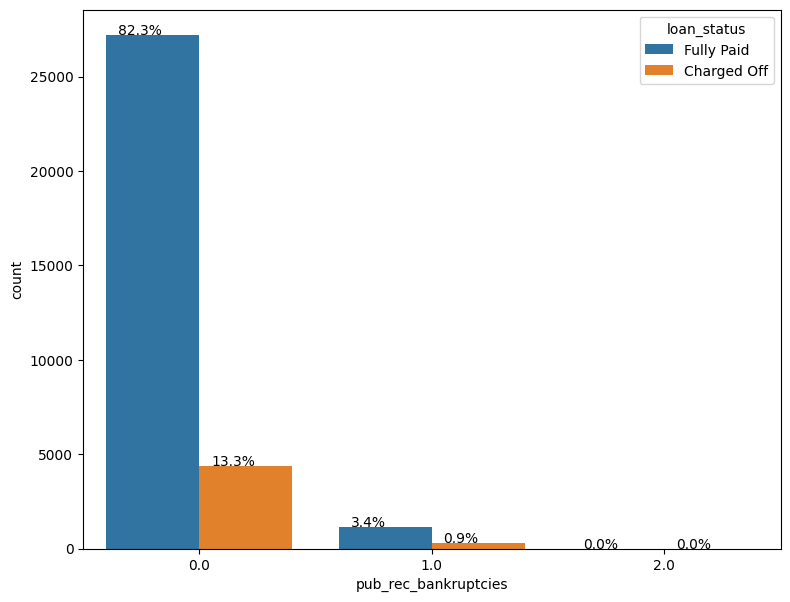

In [128]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'pub_rec_bankruptcies', 'loan_status')

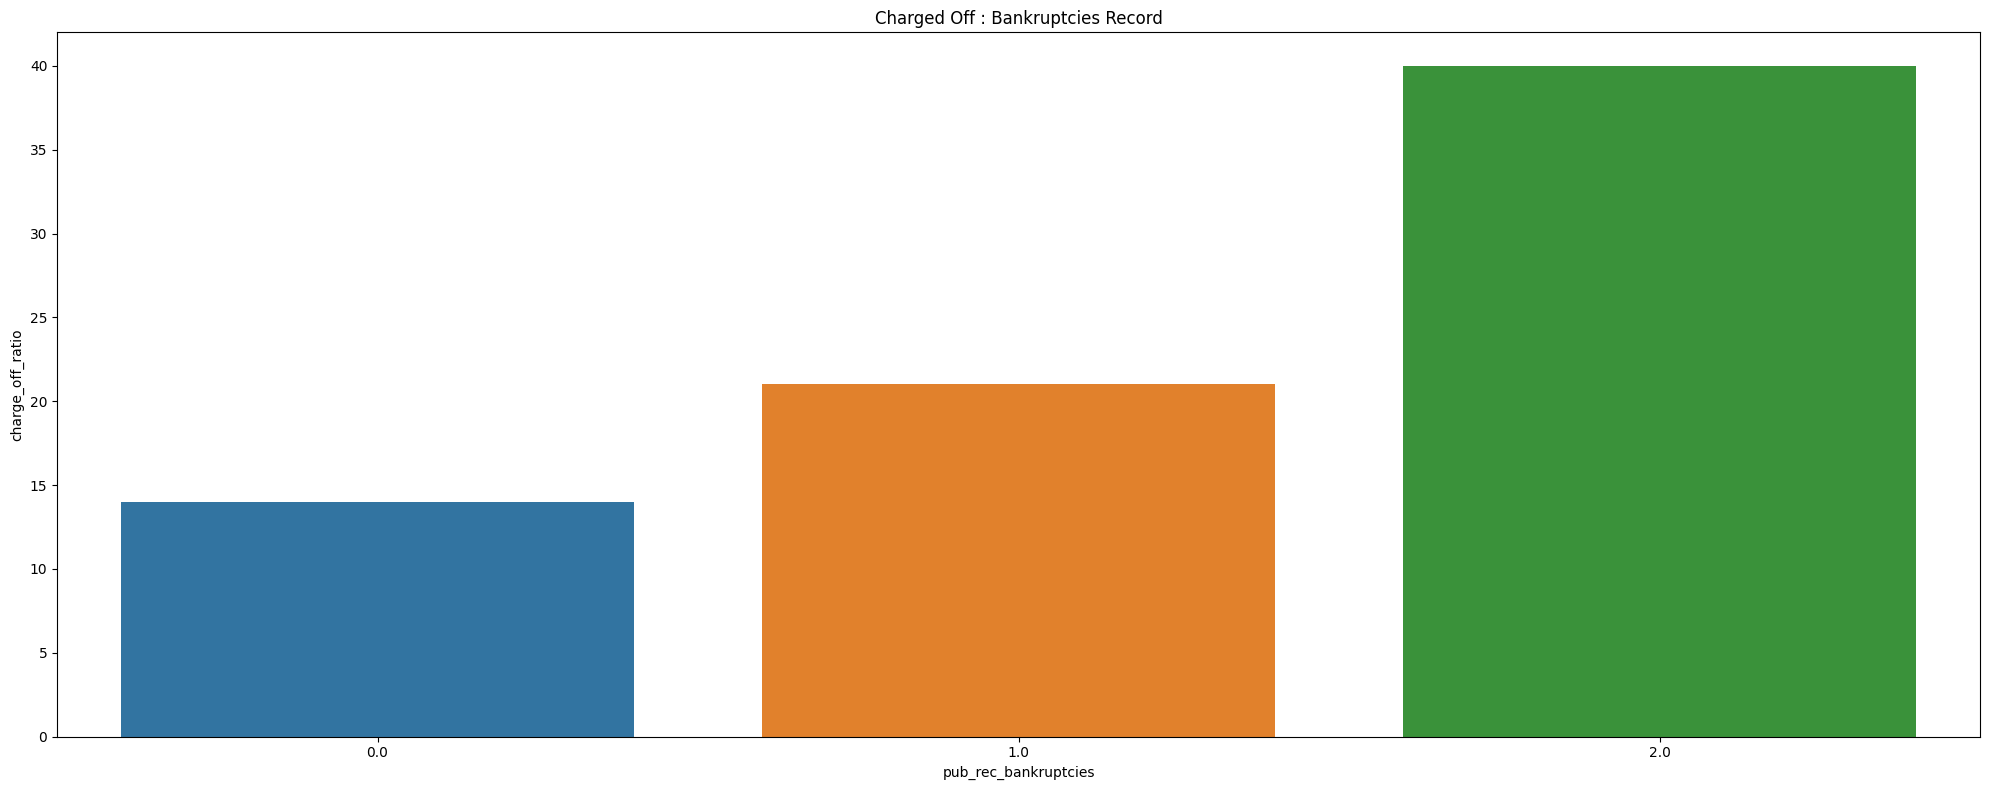

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,4382,27188,31570,14.0
1,1.0,307,1135,1442,21.0
2,2.0,2,3,5,40.0


In [129]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'pub_rec_bankruptcies')

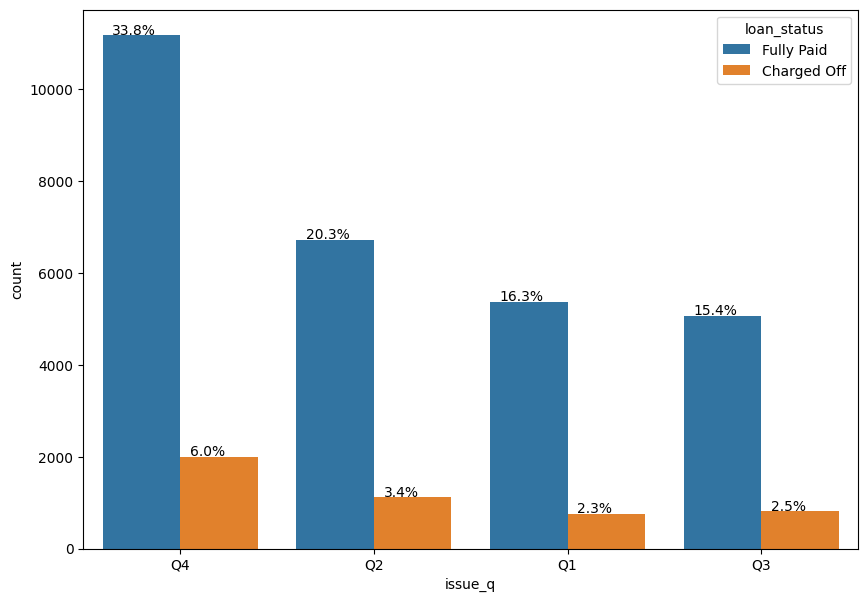

In [130]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'issue_q', 'loan_status')

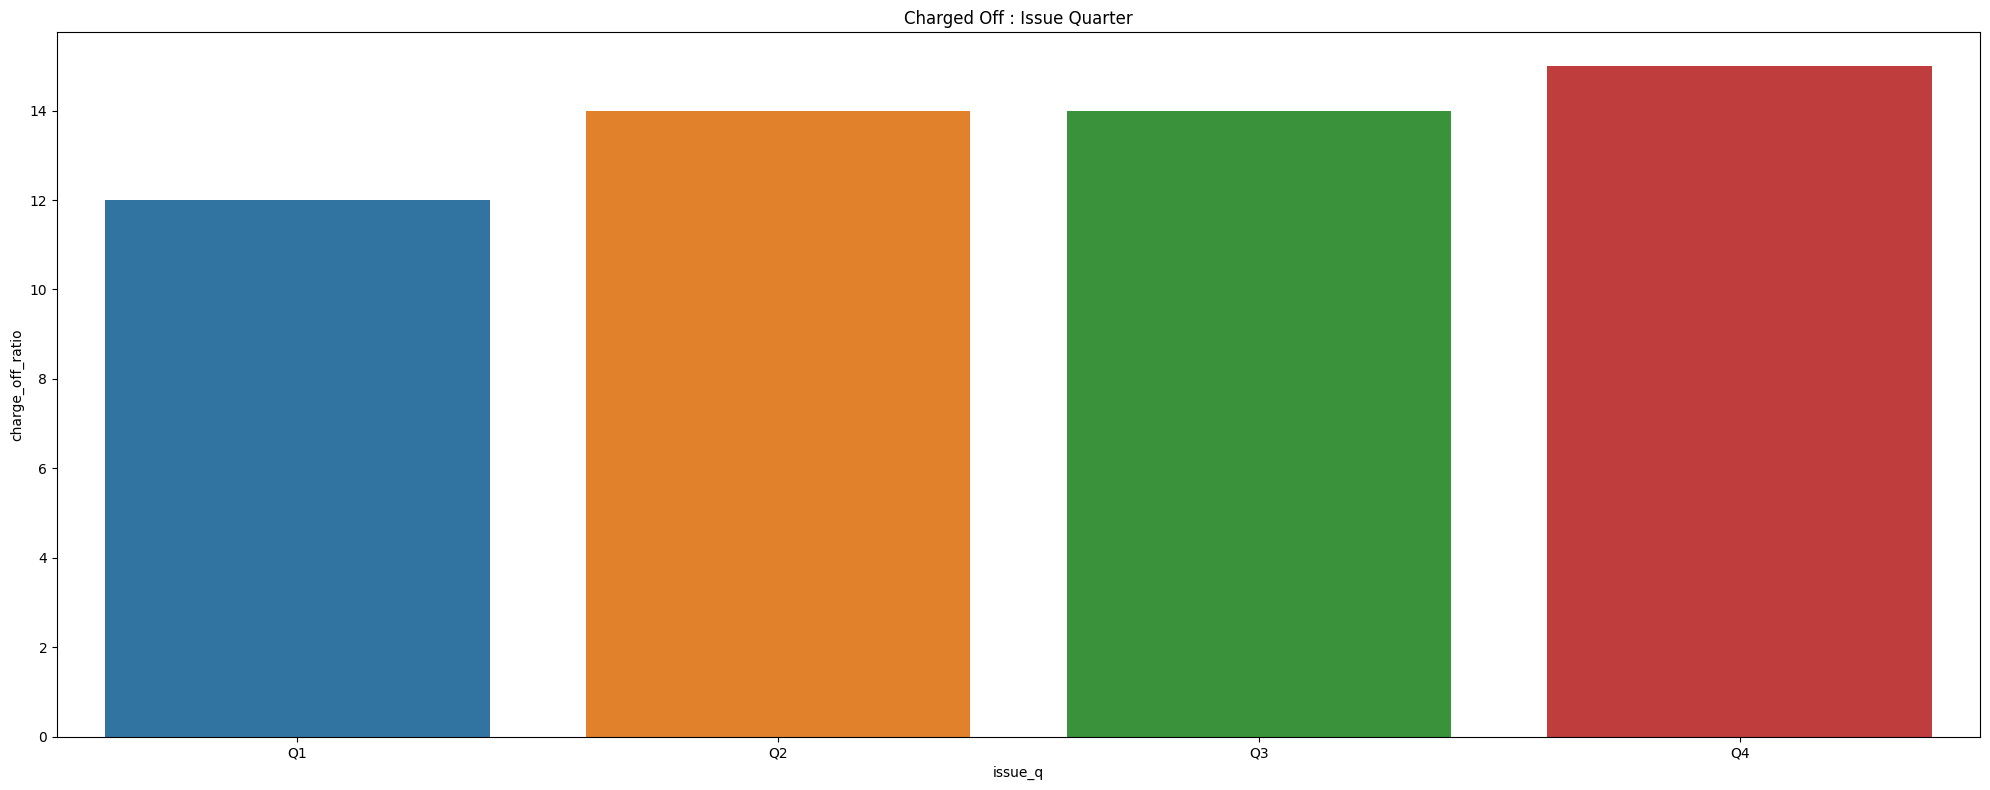

loan_status,issue_q,Charged Off,Fully Paid,total,charge_off_ratio
0,Q1,759,5372,6131,12.0
1,Q2,1122,6716,7838,14.0
2,Q3,816,5069,5885,14.0
3,Q4,1994,11169,13163,15.0


In [131]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'issue_q')

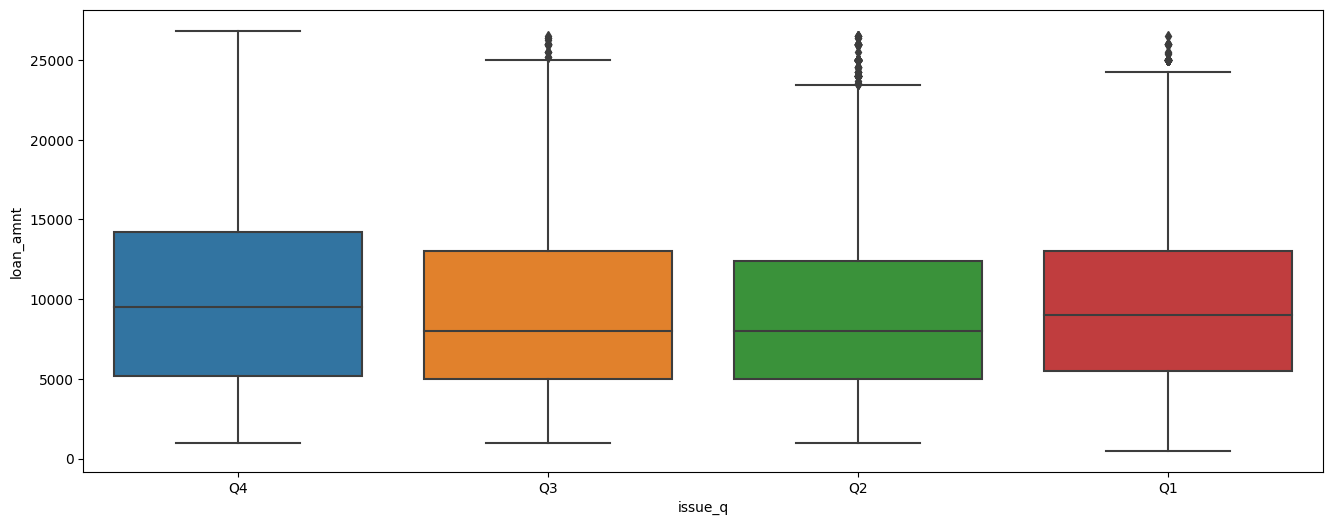

In [132]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.issue_q)
plt.show()

Quarter 4 has the highest ratio of Charge Offs
Year has no significant impact as apart from volume increasing year over year, which is impacting charge offs
2007 has the maximum Charge Offs. Any current loan running, which started in 2007 may have risk
# Inferences
Q4 of the year has the highest Charge Off's
Charge Off's will increase year over year as the loan volume increase



---
Annual Income Bucket (annual_inc_b)


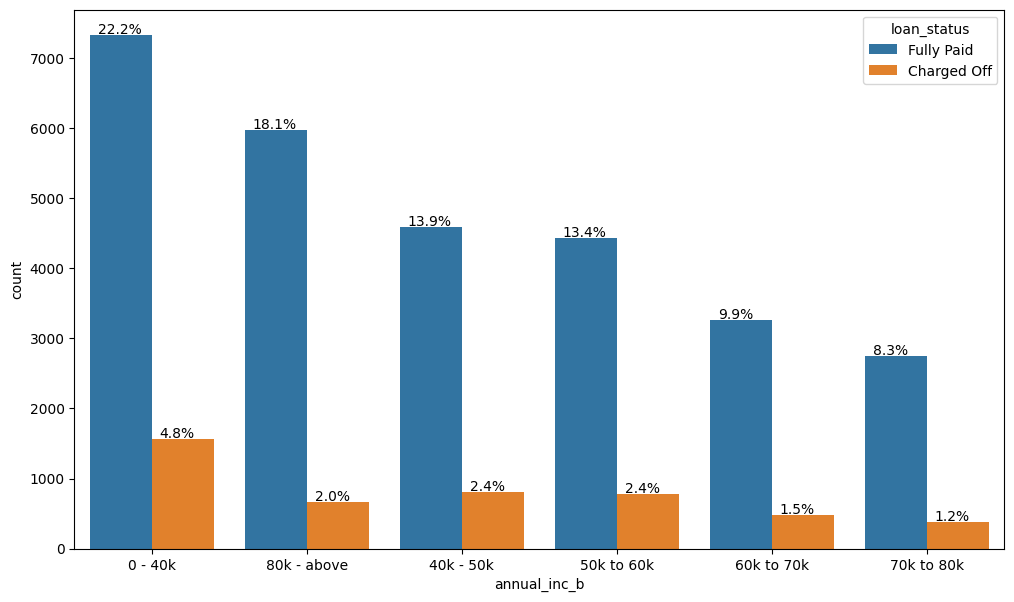

In [133]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'annual_inc_b', 'loan_status')

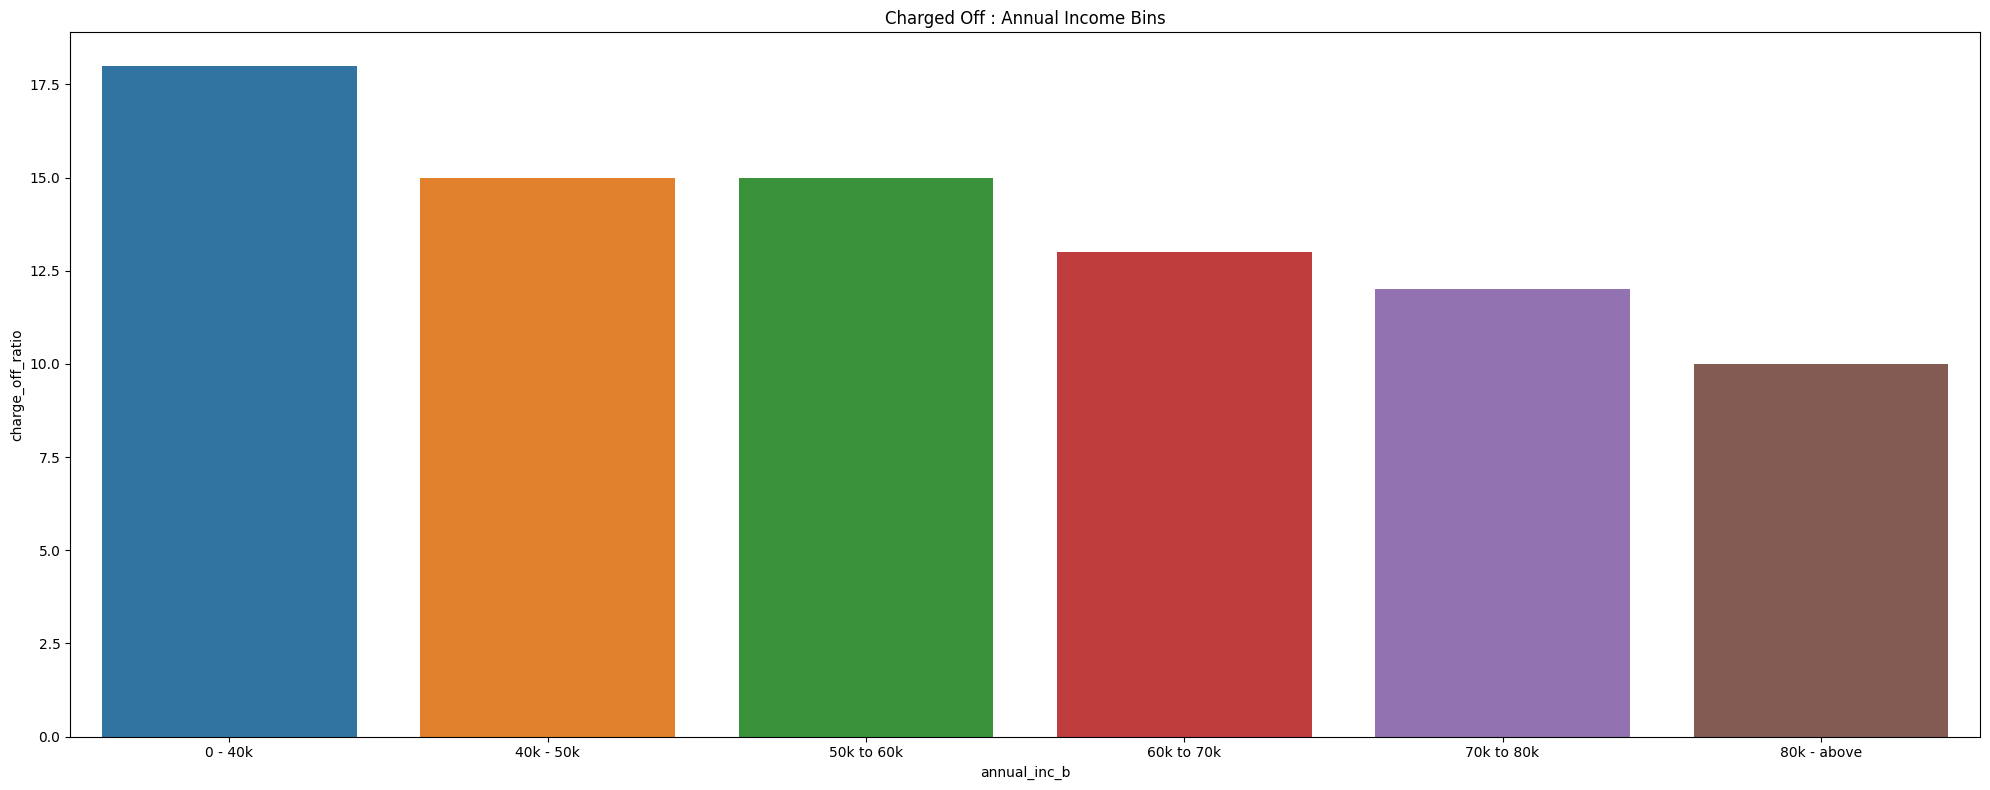

loan_status,annual_inc_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1570,7326,8896,18.0
1,40k - 50k,807,4591,5398,15.0
2,50k to 60k,785,4430,5215,15.0
3,60k to 70k,485,3256,3741,13.0
4,70k to 80k,383,2744,3127,12.0
5,80k - above,661,5979,6640,10.0


In [134]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'annual_inc_b')

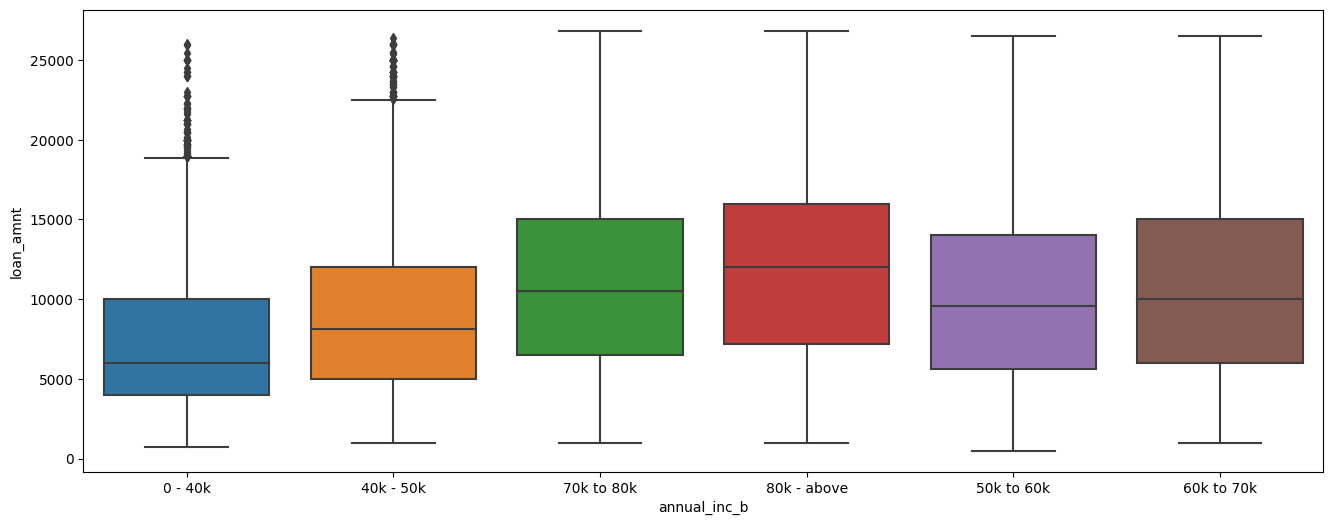

In [135]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.annual_inc_b)
plt.show()

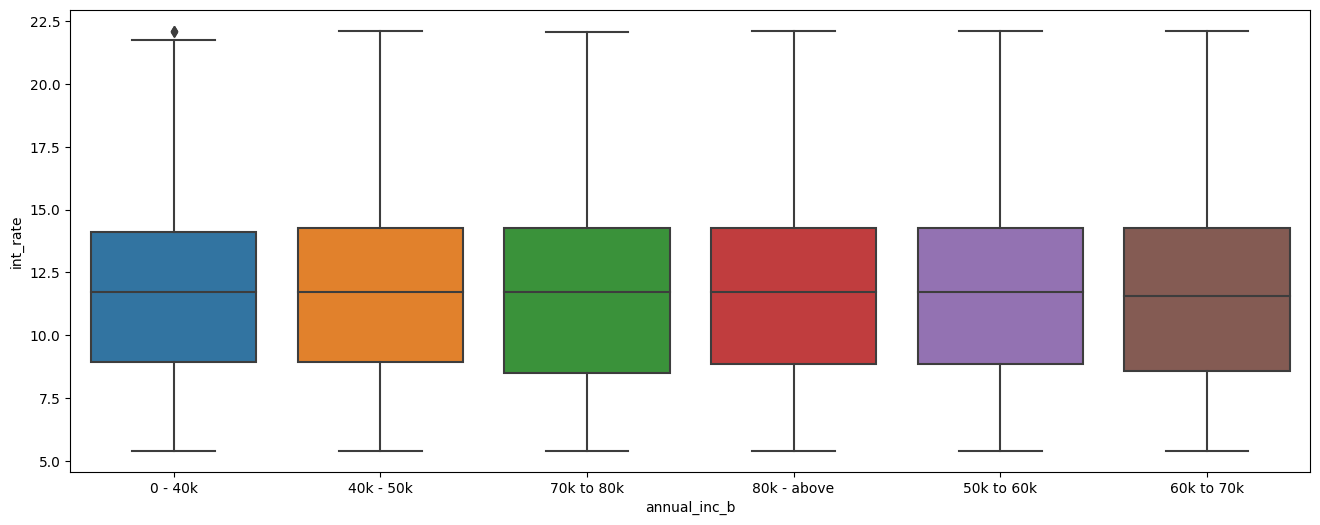

In [136]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.int_rate,x=loan.annual_inc_b)
plt.show()

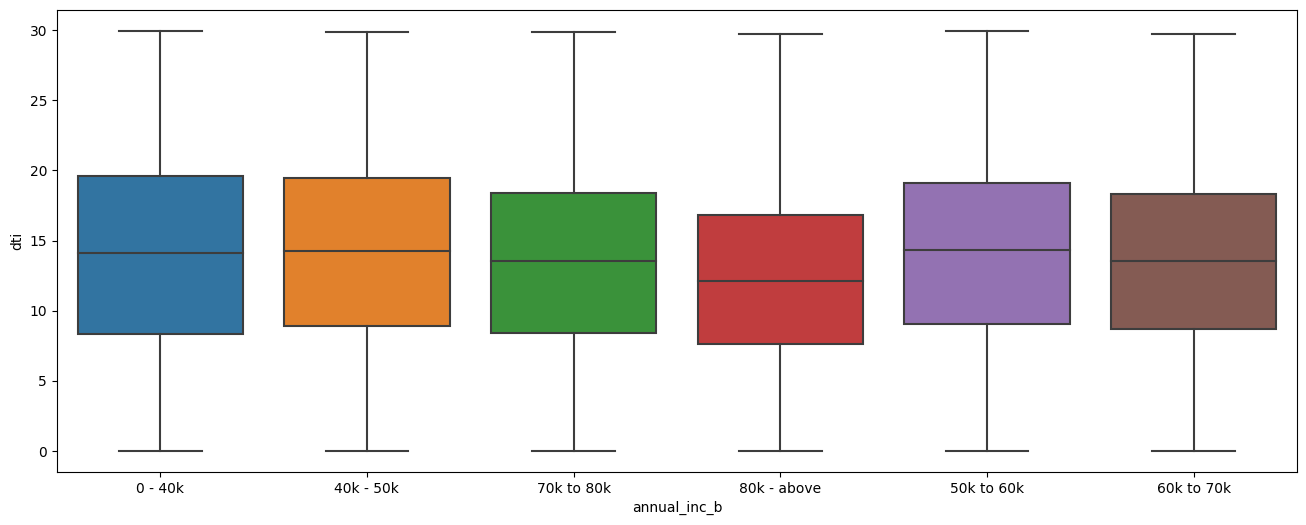

In [137]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.dti,x=loan.annual_inc_b)
plt.show()


Annual income range of 0-40K has the highest charge offs
Charge off ratio within the bucket of 0-40K have highest Charge Offs
# Inferences

Income range of 0-40K have the highest risk
Income range 80000+ has less chances of charged off.
Increase in annual income charged off proportion decreases.

---
# Loan Amount Bucket (loan_amnt_b)

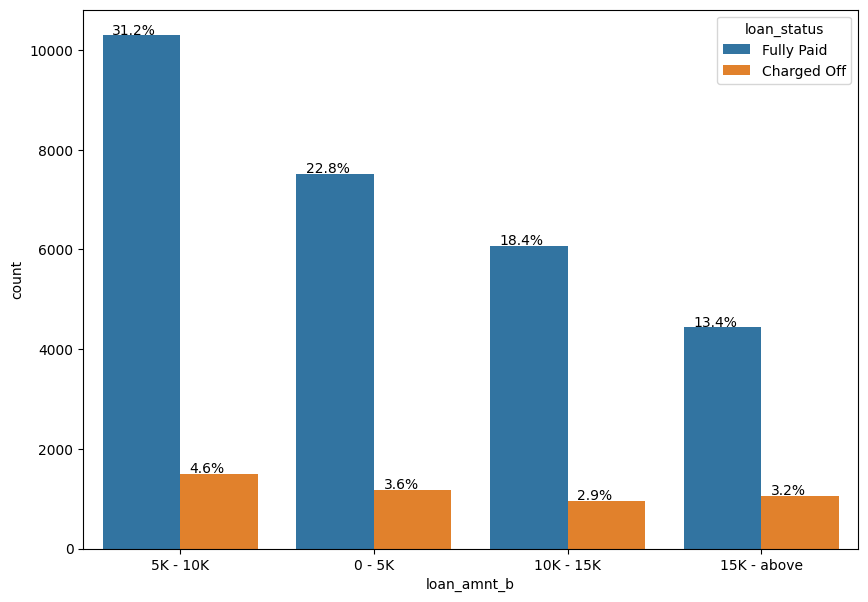

In [138]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'loan_amnt_b', 'loan_status')

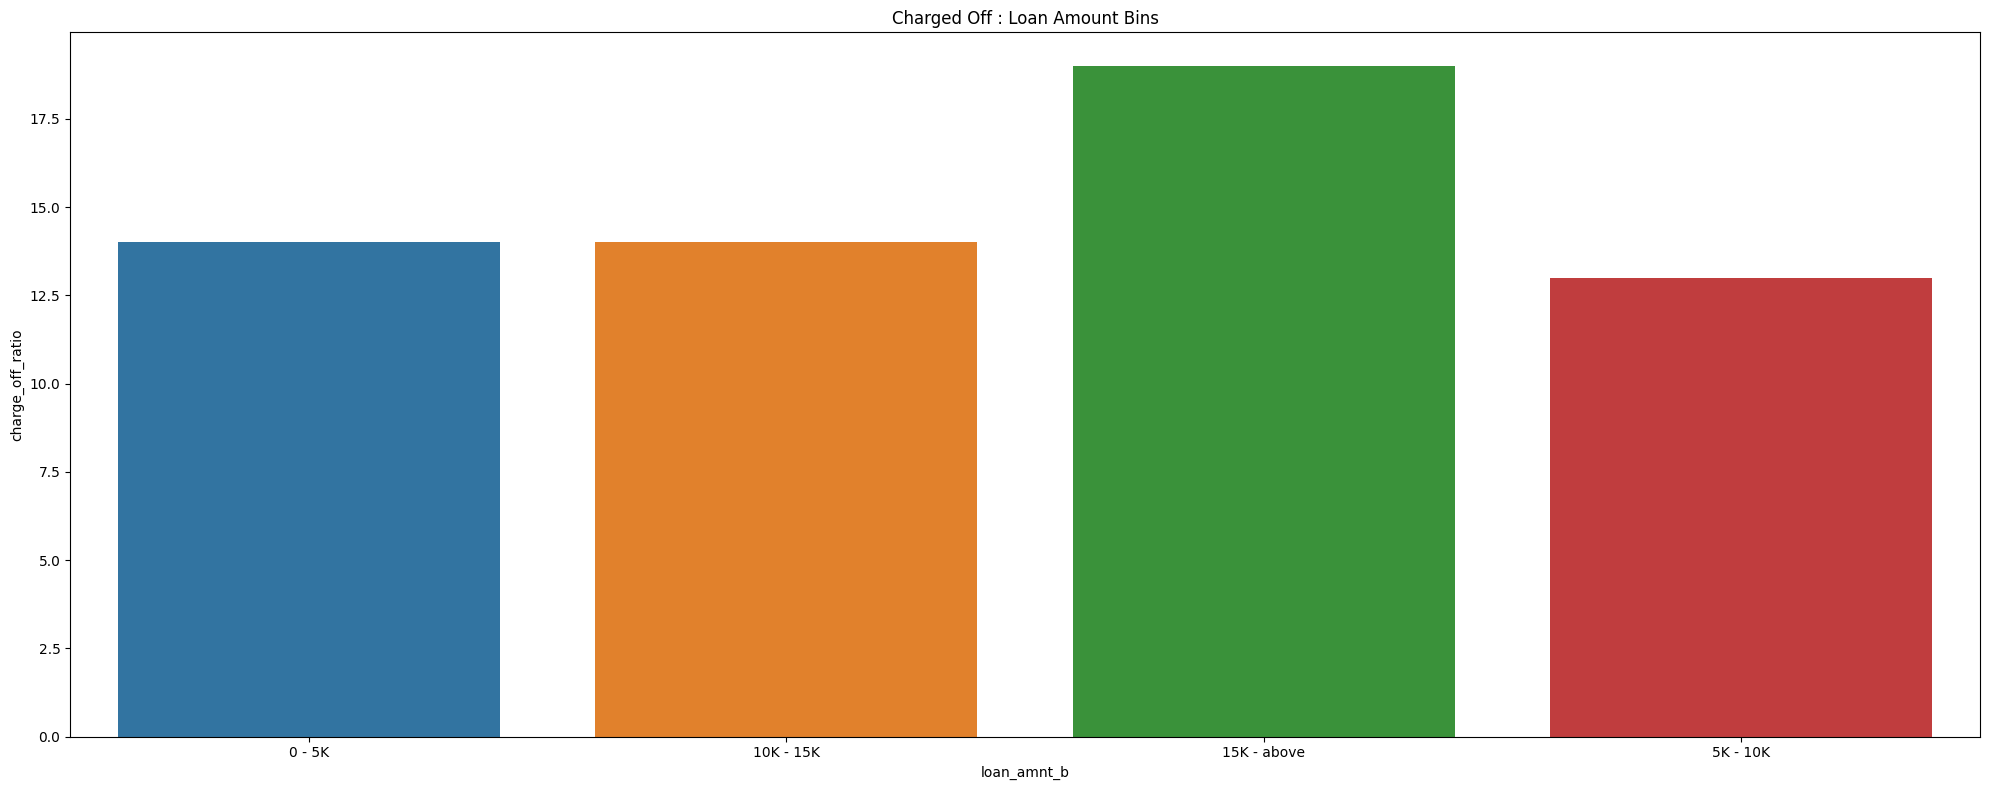

loan_status,loan_amnt_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 5K,1180,7520,8700,14.0
1,10K - 15K,954,6077,7031,14.0
2,15K - above,1054,4436,5490,19.0
3,5K - 10K,1503,10293,11796,13.0


In [139]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'loan_amnt_b')

Based on volume highest percentage of Charge Offs are in the category of 5K to 10k of loan_ammount
The Charge Off ratio of all the customer;s within the loan_amount of 15K and above is at the highest CHarge Off risk
# Inferences
Charge Off risk of loan amount 15K and above is at the highest risk

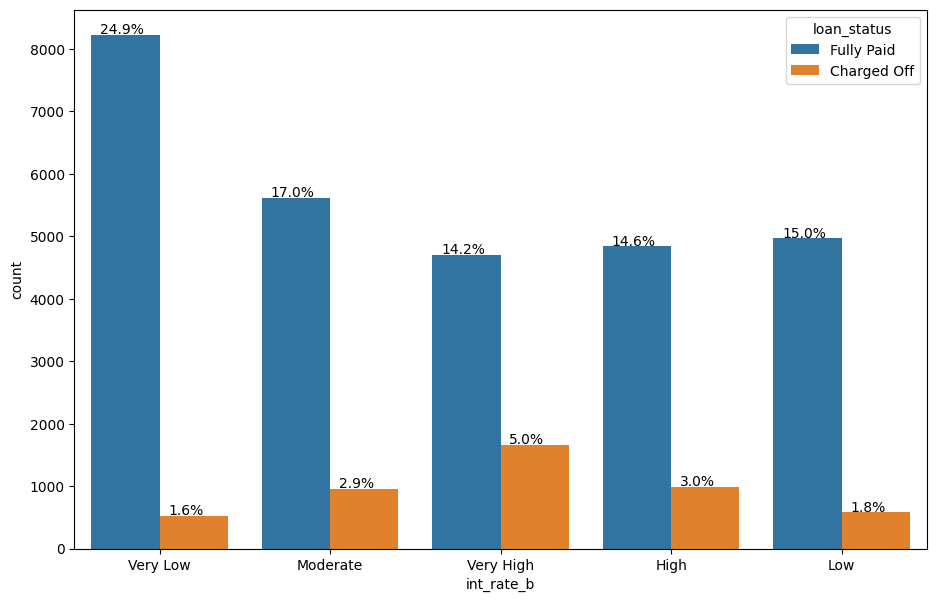

In [140]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'int_rate_b', 'loan_status')

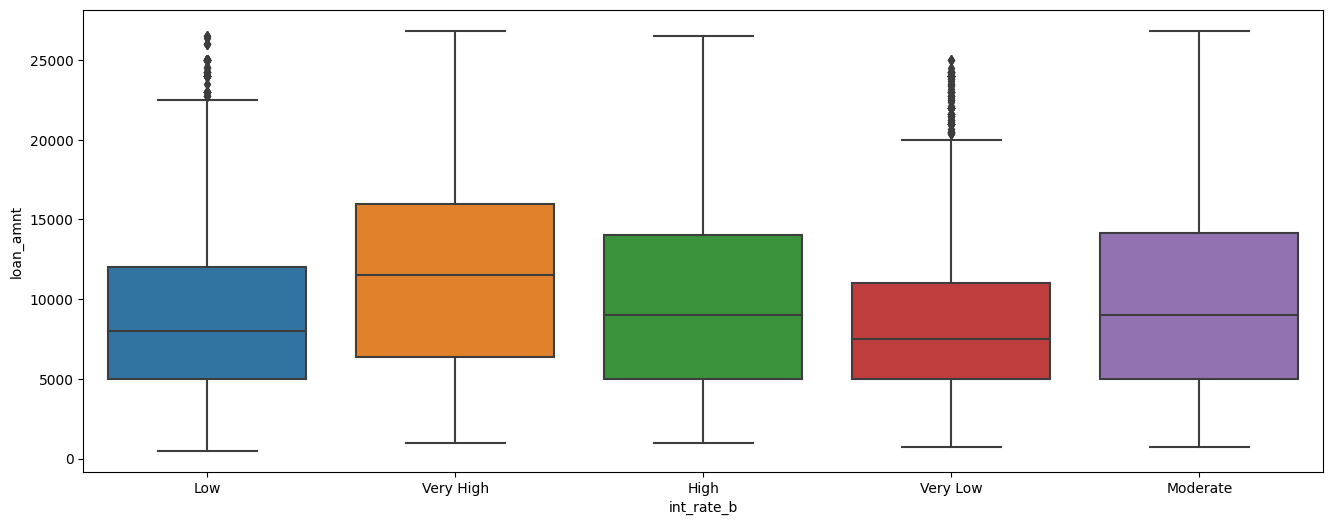

In [141]:
plt.figure(figsize=(16,6))
sns.boxplot(y=loan.loan_amnt,x=loan.int_rate_b)
plt.show()


Based on volume and based on Charge Off ratio within the category, the Very High interest rates are in risk of Charge Off
Very High interest rate is 15% and above

## Correlation Analysis

In [142]:
corr_loan = loan

In [143]:
# Printing column info to analyse missing values, empty values in a column
print(corr_loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33017 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33017 non-null  int64         
 1   loan_amnt             33017 non-null  float64       
 2   term                  33017 non-null  int64         
 3   int_rate              33017 non-null  float64       
 4   installment           33017 non-null  float64       
 5   grade                 33017 non-null  object        
 6   emp_length            33017 non-null  float64       
 7   home_ownership        33017 non-null  object        
 8   annual_inc            33017 non-null  float64       
 9   verification_status   33017 non-null  object        
 10  issue_d               33017 non-null  datetime64[ns]
 11  loan_status           33017 non-null  object        
 12  purpose               33017 non-null  object        
 13  zip_code        

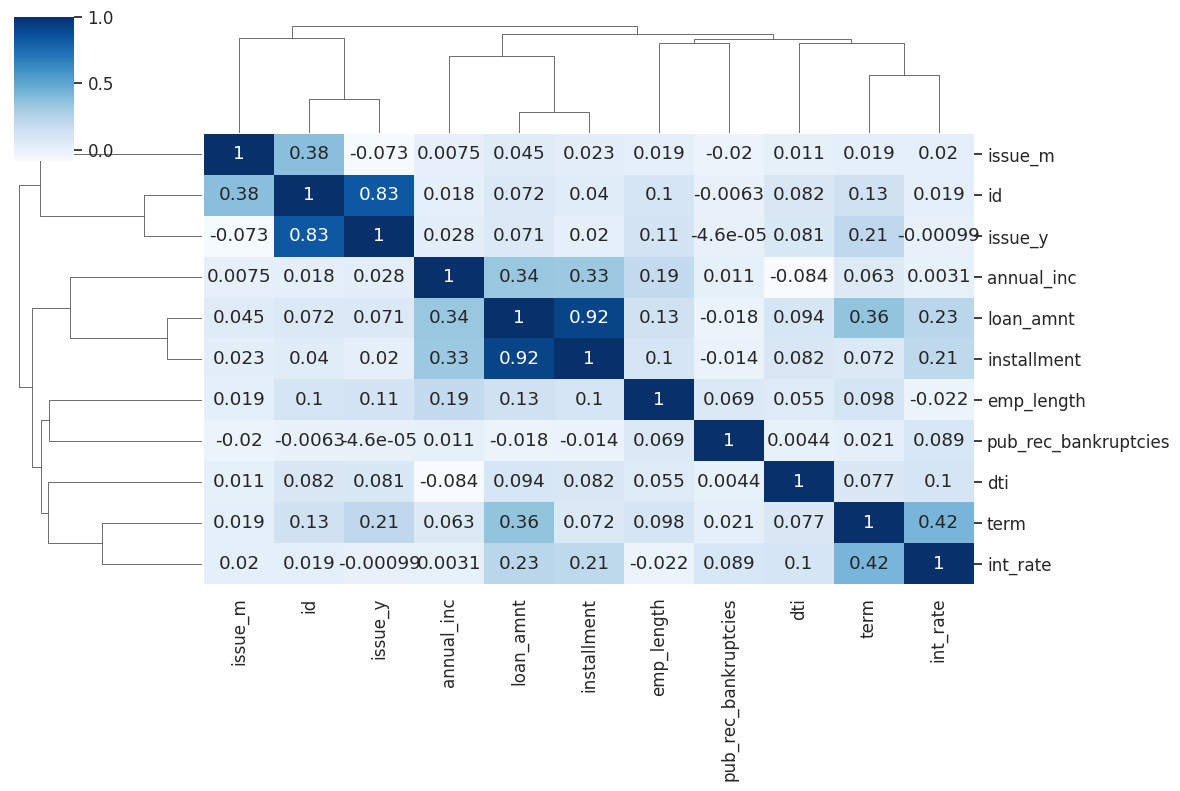

In [144]:
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

In [145]:
# Data-Cleanning
# Dropping redundant fields related to the 'loan_amnt'. They show high correlation in the corr-matrix
# Dropping fields id which do not contribute to analysis
# Dropping fields issue_y and issue_m
drop_columns = ['installment', 'id', 'issue_y', 'issue_m']
corr_loan = corr_loan.drop(columns=drop_columns)

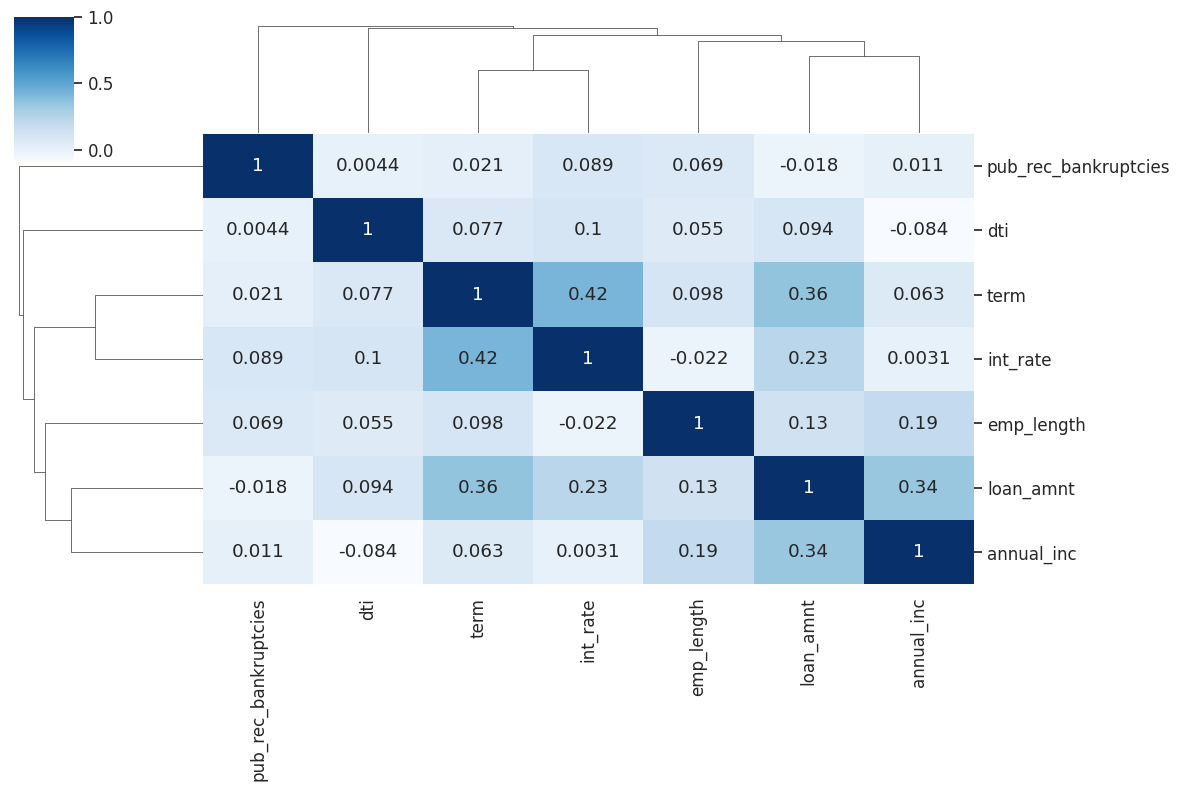

In [147]:
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()


# Negative Correlation

loan_amnt has negative correlation with pub_rec_bankrupticies
annual income has a negative correlation with dti
# Strong Correlation

term has a strong correlation with loan amount
term has a strong correlation with interest rate
annual income has a strong correlation with loan_amount
# Weak Correlation

pub_rec_bankruptcies has weak correlation with most of the firlds

<Axes: xlabel='term', ylabel='loan_amnt'>

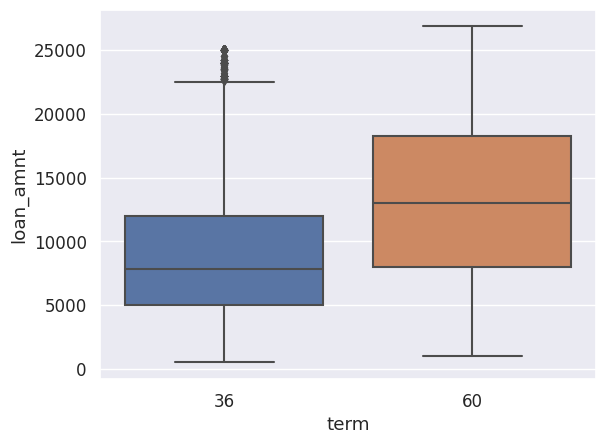

In [149]:
sns.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

<Axes: xlabel='term', ylabel='int_rate'>

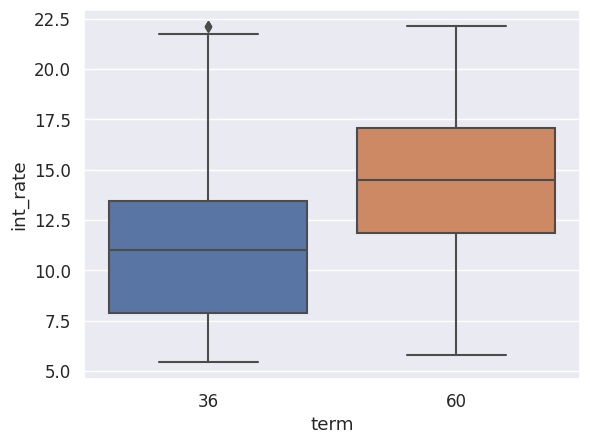

In [150]:
sns.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

<Axes: xlabel='term', ylabel='int_rate'>

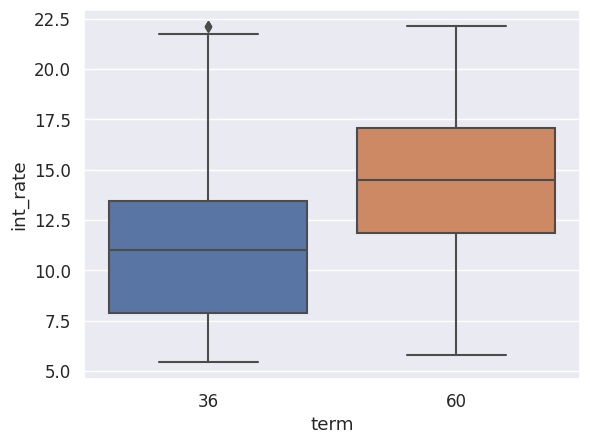

In [151]:
sns.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

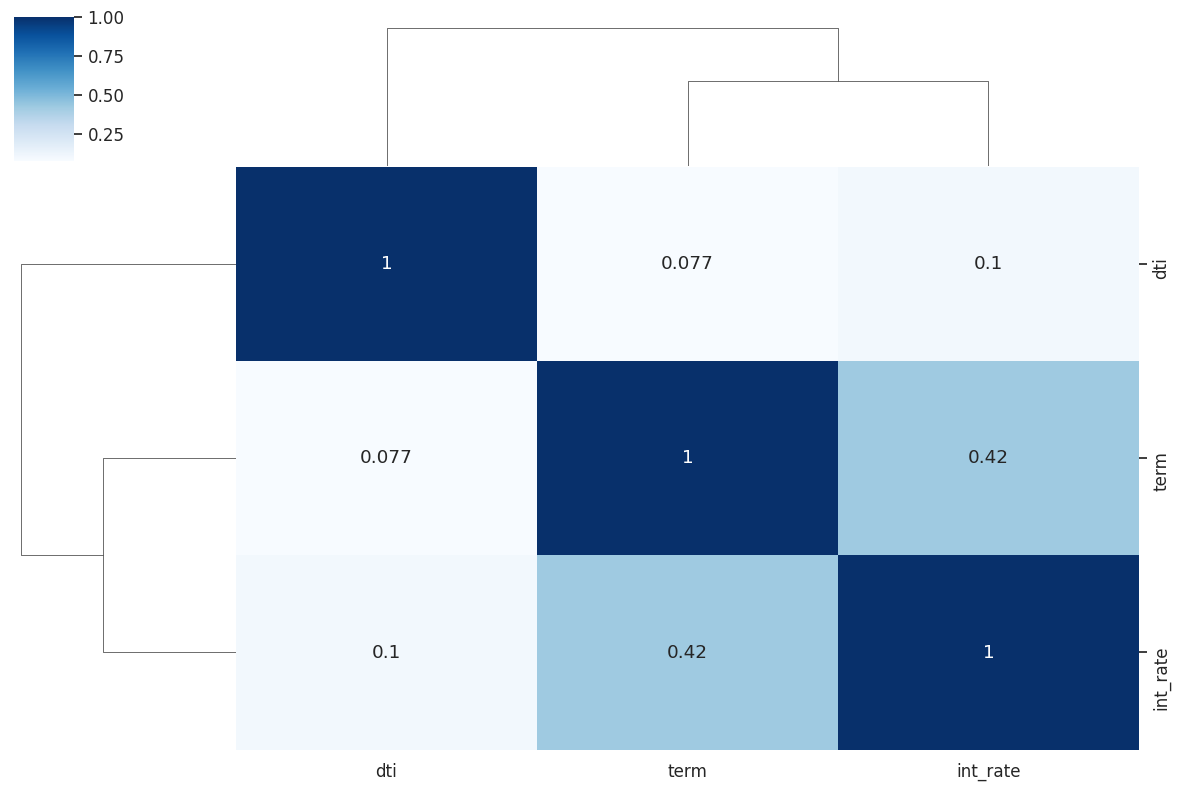

In [152]:
corr = corr_loan.loc[:, [ 'term', 'int_rate', 'dti']].corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()